# People Analytics 

## Case Description

1. The HRD department receives many complaints about many employees leaving the company and complaints about poor employee performance.
2. Lead of People wants to prevent employee turnover as well as increase employee performance.
3. To resolve the problems, he assigned you to make a data product that helps him assess the problems.
4. Lead of People needs to assess:
    - a. How bad is the employee turnover? What factors might be the cause?
    - b. How bad is the employee performance? What factors might be the cause?
5. Lead of People asks you to provide a simple people analytics dashboard to help him assess the employee turnover and performance data.

## Objectives

The objective of this project is to analyze the provided data to assess employee turnover and performance. Additionally, a people analytics dashboard will be created to present key insights and assist the Lead of People in making informed decisions.




## Turnover Analysis

Questions

Exploring factors like age, gender, education, departement, performane, and absenteeism

1. What is the overall turnoever rate for the company?
2. Do certain age groups exhibit higher turnover?
3. Do certain gender has hihger turnover?
4. Are employee with ceratain education levels more likely to leave?
5. Is there a correlatoin between performance rating and turnover?
6. What role does absenteeism play in turnoever?
7. Do certain departments have a high turnover rate?
8. Do non-promoted employees have a higher turnover rate?
9.Find out the effect of job dissatisfaction.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Import the dataset

people_df = pd.read_excel("Dataset Liveclass week 3.xlsx")

people_df.head()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EmployeID,Gender,Age,Education,Department,Performance_Rating,Absent,Turnover,ESI_1,ESI_2,ESI_3,Promoted_This_Year,Complete_Training_Course,Training_Evaluation_Score,Min._Training_Eval_Pass_Score
0,BCGX7377,Male,27,Master’s degree,Business Development,7.92,1,No,9,8,6,No,Yes,98,70
1,BCGX4795,Male,44,Higher education (Bachelor’s degree),Engineering,5.94,7,No,8,10,9,No,No,91,70
2,BCGX4007,Female,21,Higher education (Bachelor’s degree),Human Resources,9.90,0,No,8,10,10,Yes,No,62,70
3,BCGX9524,Male,47,Higher education (Bachelor’s degree),Business Development,9.90,5,No,7,9,8,Yes,No,77,70
4,BCGX8426,Female,46,Doctor of Philosophy (Ph.D.),Product Management,7.92,4,No,9,9,9,No,Yes,85,70


In [ ]:
#check the data types is correct 
people_df.dtypes

EmployeID                         object
Gender                            object
Age                                int64
Education                         object
Department                        object
Performance_Rating               float64
Absent                             int64
Turnover                          object
ESI_1                              int64
ESI_2                              int64
ESI_3                              int64
Promoted_This_Year                object
Complete_Training_Course          object
Training_Evaluation_Score          int64
Min._Training_Eval_Pass_Score      int64
dtype: object

In [ ]:
people_df.describe()

,Age,Performance_Rating,Absent,ESI_1,ESI_2,ESI_3,Training_Evaluation_Score,Min._Training_Eval_Pass_Score
count,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.0
mean,34.853630,7.554157,3.809133,7.613583,8.090164,7.785714,80.477752,70.0
std,9.330125,1.247926,2.094454,1.457681,1.433994,1.474991,12.015576,0.0
min,19.000000,5.090000,0.000000,5.000000,5.000000,5.000000,59.000000,70.0
25%,27.000000,6.930000,2.000000,6.000000,7.000000,6.000000,70.000000,70.0
50%,35.000000,7.570000,4.000000,7.000000,8.000000,8.000000,83.000000,70.0
75%,43.000000,8.320000,6.000000,9.000000,9.000000,9.000000,89.000000,70.0
max,51.000000,9.900000,7.000000,10.000000,10.000000,10.000000,100.000000,70.0


In [ ]:
people_df.isna().sum()

EmployeID                        0
Gender                           0
Age                              0
Education                        0
Department                       0
Performance_Rating               0
Absent                           0
Turnover                         0
ESI_1                            0
ESI_2                            0
ESI_3                            0
Promoted_This_Year               0
Complete_Training_Course         0
Training_Evaluation_Score        0
Min._Training_Eval_Pass_Score    0
dtype: int64


### 1. What is the overall turnoever rate for the company?
Understanding the baseline turnover rate provides a starting point for analyzing the severity of the issue.

C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\1588294673.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Turnover', data=people_df, palette={'No': 'blue', 'Yes': 'orange'})


Overall Turnover Rate: 13.93%




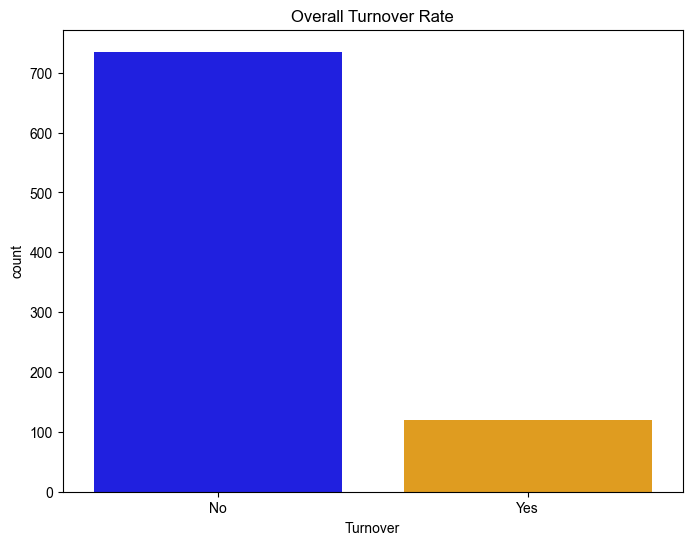

In [ ]:
people_df["Turnover"].replace("v", "No", inplace=True)

total_employees = len(people_df["EmployeID"])
employees_left = len(people_df[people_df["Turnover"] == "Yes"])

turnover_rate = employees_left / total_employees * 100

print(f"Overall Turnover Rate: {turnover_rate:.2f}%")
print("\n")

# Visualize

plt.figure(figsize=(8, 6))
sns.countplot(x='Turnover', data=people_df, palette={'No': 'blue', 'Yes': 'orange'})
sns.set_style('darkgrid')
plt.title('Overall Turnover Rate')
plt.show()

### 2. Do certain age groups exhibit higher turnover?

Identifying age-specific turnover patterns.

Turnover by Age:
Age
19    0.100000
20    0.125000
21    0.107143
22    0.120000
23    0.181818
24    0.185185
25    0.275862
26    0.166667
27    0.147059
28    0.136364
29    0.085714
30    0.108108
31    0.080000
32    0.263158
33    0.040000
34    0.105263
35    0.153846
36    0.117647
37    0.233333
38    0.080000
39    0.137931
40    0.050000
41    0.115385
42    0.227273
43    0.178571
44    0.269231
45    0.047619
46    0.166667
47    0.192308
48    0.066667
49    0.111111
50    0.173913
51         NaN
Name: Yes, dtype: float64


C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\1033759642.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_turnover = people_df.groupby("Age_Bins")["Turnover"].value_counts(normalize=True).unstack()['Yes']


<function matplotlib.pyplot.show(close=None, block=None)>

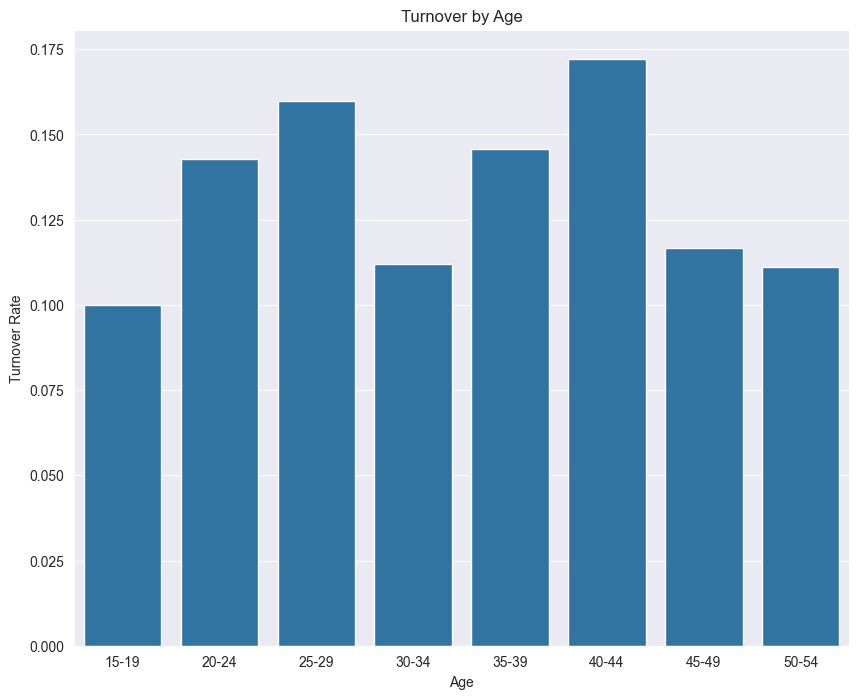

In [ ]:
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55]
age_labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']

age_turnover = people_df.groupby('Age')['Turnover'].value_counts(normalize=True).unstack()['Yes']
print("Turnover by Age:")
print(age_turnover)



people_df["Age_Bins"] = pd.cut(people_df["Age"], bins = age_bins, labels = age_labels, right=False)


age_bin_turnover = people_df.groupby("Age_Bins")["Turnover"].value_counts(normalize=True).unstack()['Yes']

plt.figure(figsize=(10,8))
sns.barplot(x =age_bin_turnover.index, y=age_bin_turnover)
plt.title("Turnover by Age")
plt.xlabel("Age")
plt.ylabel("Turnover Rate")
plt.show

### 3. Do certain gender has higher turnover?

Gender turnover analysis for ensuring the gender equality and addressing any disparities in thework environtment that might lead to higher turnover rates for a particular gender

Gender
Female    0.159910
Male      0.117073
Name: Yes, dtype: float64


C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\2292037702.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_turnover.index, y=gender_turnover, palette={'Male': 'blue', 'Female': 'orange'})


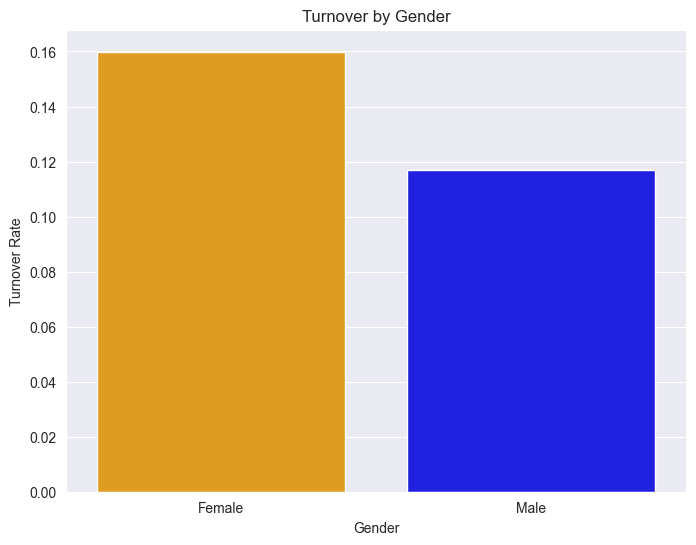

In [ ]:
gender_turnover = people_df.groupby('Gender')['Turnover'].value_counts(normalize=True).unstack()["Yes"]
print(gender_turnover)


plt.figure(figsize=(8, 6))
sns.barplot(x=gender_turnover.index, y=gender_turnover, palette={'Male': 'blue', 'Female': 'orange'})
plt.title('Turnover by Gender')
plt.xlabel('Gender')
plt.ylabel('Turnover Rate')
plt.show()
    

### 4. Are employee with ceratain education levels more likely to leave?

Analyzing turnover across education levels, to helps in understanding there are specific educational backgrounds more prone to attrition. 
Educational level can impact career aspiration

Education
Doctor of Philosophy (Ph.D.)            0.148148
Higher education (Bachelor’s degree)    0.120000
Master’s degree                         0.167857
Primary education                       0.125000
Secondary education                     0.114943
Name: Yes, dtype: float64


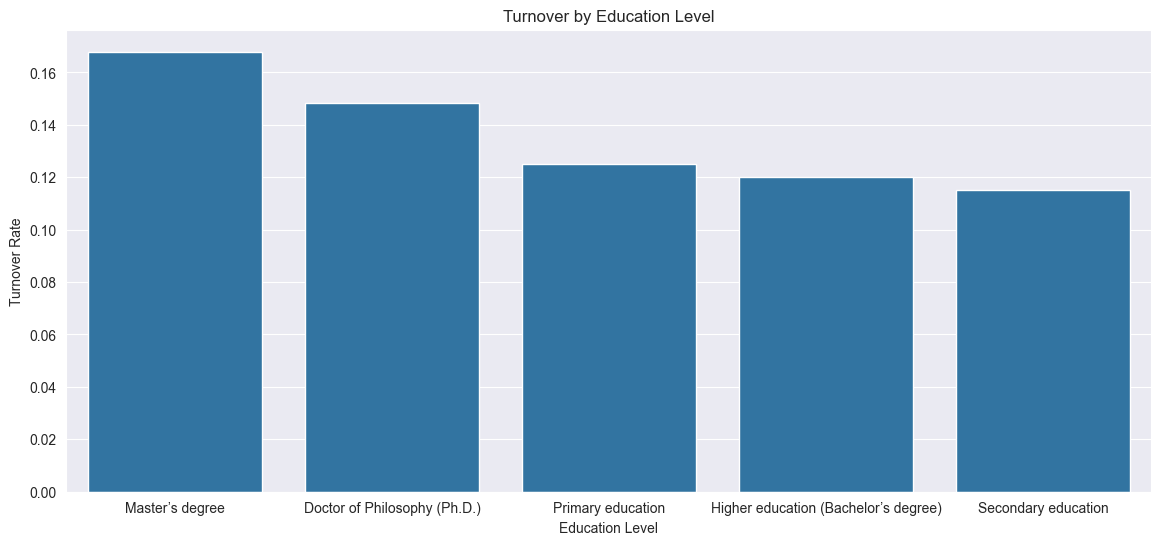

In [ ]:
# Calculate education turnover
education_turnover = people_df.groupby('Education')['Turnover'].value_counts(normalize=True).unstack()['Yes']
print(education_turnover)
# Sort education levels by turnover rate in descending order
sorted_education_levels = education_turnover.groupby('Education').sum().sort_values(ascending=False).index

# Visualization with sorting in descending order
plt.figure(figsize=(14, 6))
sns.barplot(x=sorted_education_levels, y=education_turnover[sorted_education_levels])

plt.title('Turnover by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Turnover Rate')
plt.show()




                               Education            Department       Yes
0           Doctor of Philosophy (Ph.D.)  Business Development  0.117647
1           Doctor of Philosophy (Ph.D.)              Creative  0.250000
2           Doctor of Philosophy (Ph.D.)                  Data  0.571429
3           Doctor of Philosophy (Ph.D.)           Engineering  0.125000
4           Doctor of Philosophy (Ph.D.)               Finance  0.250000
5           Doctor of Philosophy (Ph.D.)       Human Resources       NaN
6           Doctor of Philosophy (Ph.D.)                 Legal       NaN
7           Doctor of Philosophy (Ph.D.)             Marketing       NaN
8           Doctor of Philosophy (Ph.D.)            Operations  0.166667
9           Doctor of Philosophy (Ph.D.)    Product Management  0.250000
10          Doctor of Philosophy (Ph.D.)     Quality Assurance       NaN
11          Doctor of Philosophy (Ph.D.)                 Sales  0.181818
12  Higher education (Bachelor’s degree)  Business 

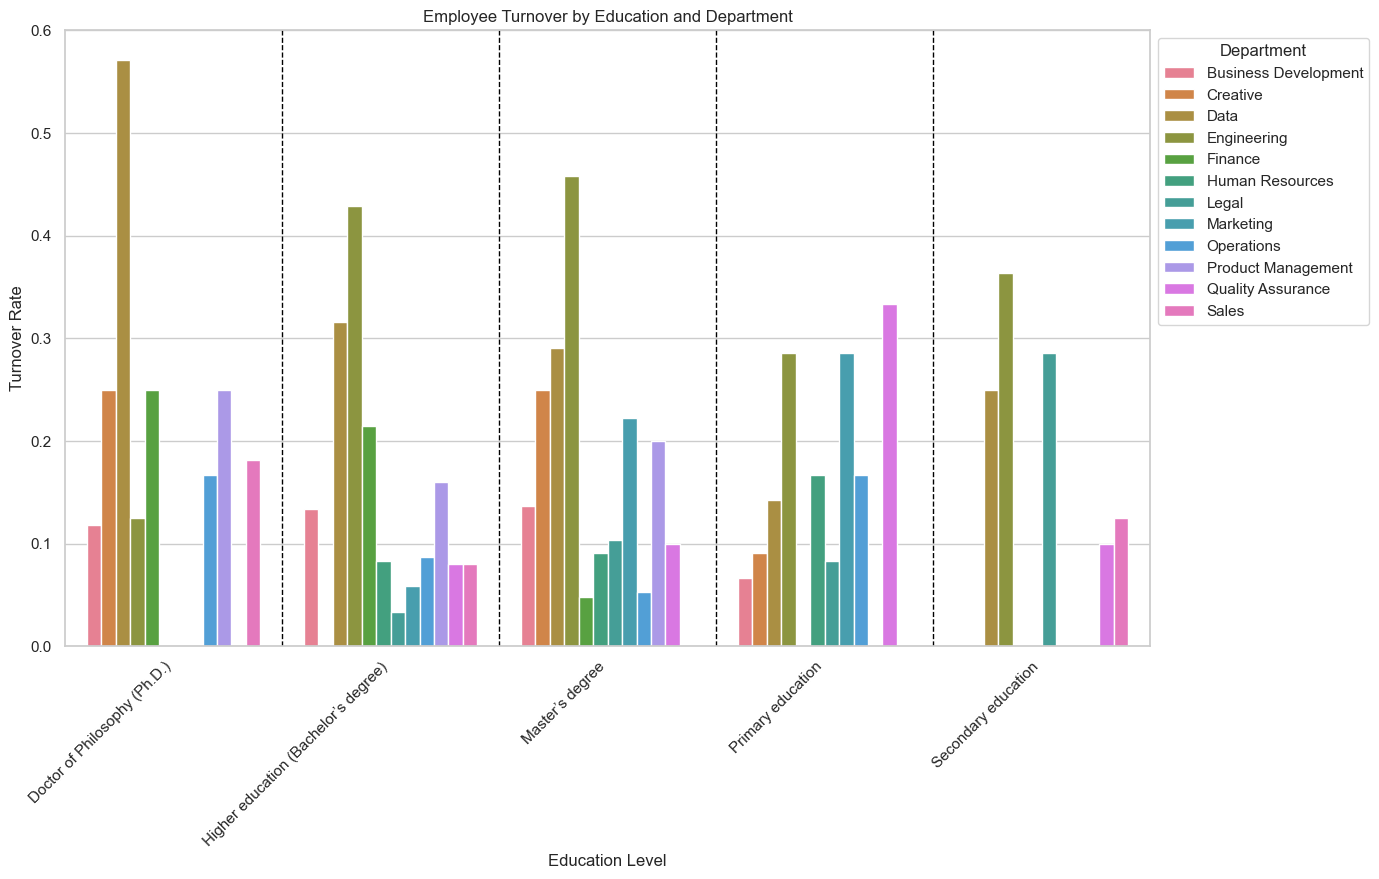

In [ ]:

# Group by 'Education' and 'Department' and calculate turnover rate
turnover_by_education_dept = people_df.groupby(['Education', 'Department'])['Turnover'].value_counts(normalize=True).unstack()['Yes'].reset_index()
print(turnover_by_education_dept)

# Sort the DataFrame by 'Education' and 'Department'
sorted_ed = people_df.sort_values(by=['Education', 'Department'], ascending=[True, True])

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a bar chart for turnover by education and department
plt.figure(figsize=(14, 8))
sns.barplot(x='Education', y='Yes', hue='Department', data=turnover_by_education_dept)

# Draw vertical lines between groups
edu_levels = turnover_by_education_dept['Education'].unique()
for i in range(len(edu_levels) - 1):
    plt.axvline(x=i + 0.5, color='black', linestyle='--', linewidth=1)

plt.title('Employee Turnover by Education and Department')
plt.xlabel('Education Level')
plt.ylabel('Turnover Rate')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.legend(title='Department', bbox_to_anchor=(1, 1))
plt.show()

### 5. Is there a correlatoin between performance rating and turnover?

Understanding the relationship between performance rating and turnover. It provides insights into whether high or low performers are likely to leave

Correlation between Performance Rating and Turnover: -0.02


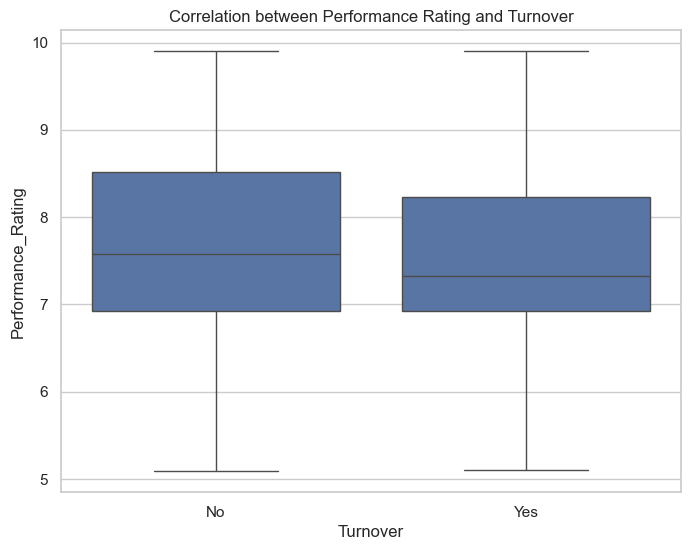

In [ ]:
performance_turnover_corr = people_df['Performance_Rating'].corr(people_df['Turnover'].eq('Yes').astype(int))
print(f"Correlation between Performance Rating and Turnover: {performance_turnover_corr:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Turnover', y='Performance_Rating', data=people_df)
plt.title('Correlation between Performance Rating and Turnover')
plt.show()


The correlation is close to zero, suggesting a very weak linear relationship.
The negative sign indicates a slight tendency for higher 'Performance Rating' to be associated with a slightly lower likelihood of 'Turnover', but the relationship is weak.

### 6. What role does absenteeism play in turnoever?

Absenteeism can be an indicator of employee dissatisfaction or personal issues.

Absent
0    0.129870
1    0.133333
2    0.139241
3    0.170455
4    0.125926
5    0.114458
6    0.185185
7    0.087719
Name: Yes, dtype: float64


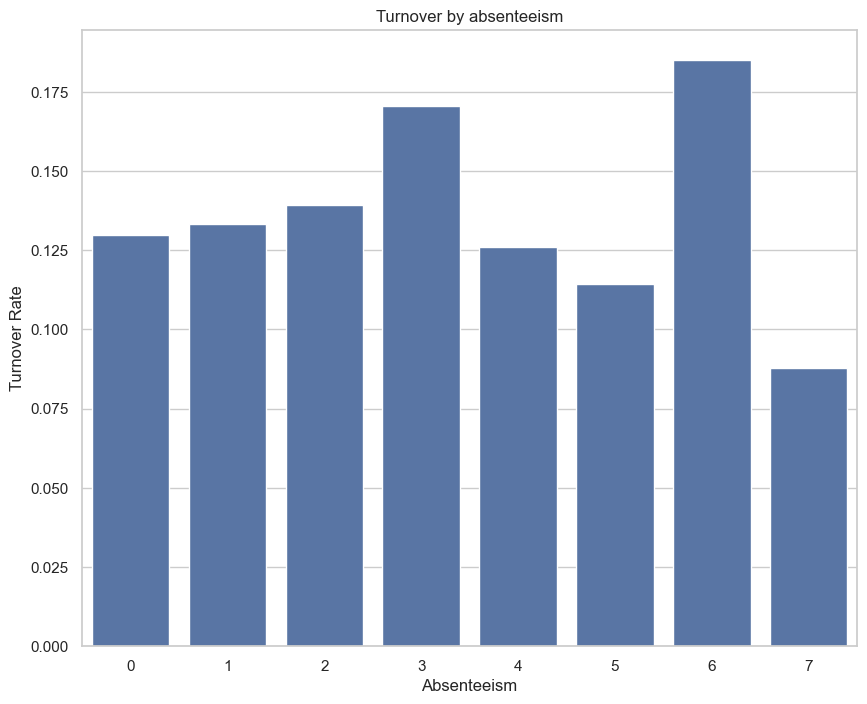

In [ ]:
absenteeism_turnover = people_df.groupby('Absent')["Turnover"].value_counts(normalize=True).unstack()["Yes"]
print(absenteeism_turnover)

plt.figure(figsize=(10,8))
sns.barplot(x= absenteeism_turnover.index, y=absenteeism_turnover)
plt.title('Turnover by absenteeism')
plt.xlabel("Absenteeism")
plt.ylabel("Turnover Rate")
plt.show()

### 7. Do certain departments have a high turnover rate?

High turnover in specific departments may indicate issues that need to be addressed, such as management or work culture.

Department
Business Development    0.107527
Creative                0.119048
Data                    0.305556
Engineering             0.375000
Finance                 0.087719
Human Resources         0.074627
Legal                   0.079545
Marketing               0.129630
Operations              0.093750
Product Management      0.157143
Quality Assurance       0.102941
Sales                   0.068493
Name: Yes, dtype: float64


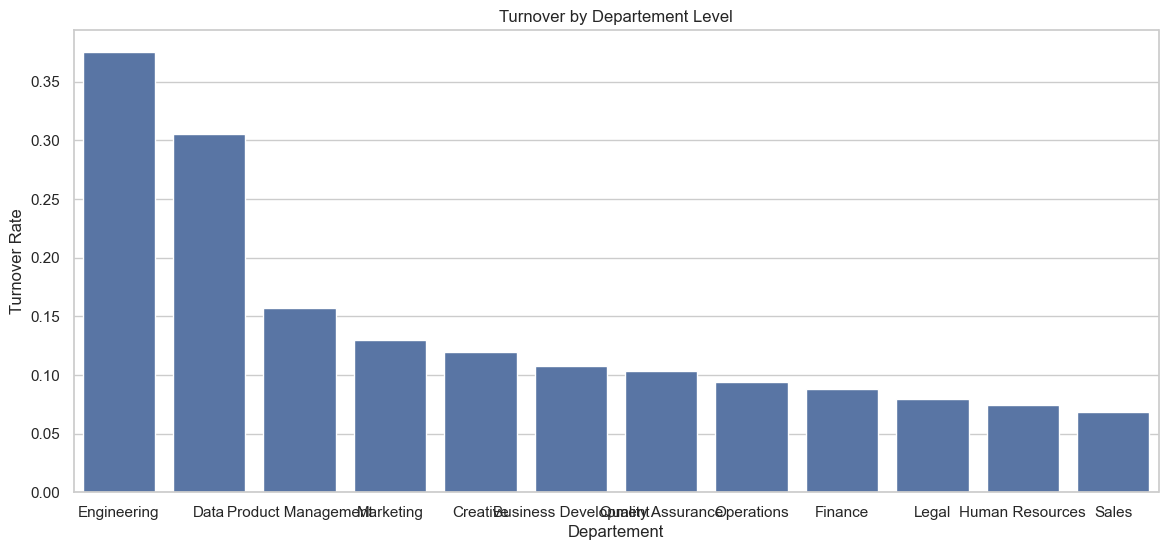

In [ ]:
departement_turnover = people_df.groupby('Department')["Turnover"].value_counts(normalize=True).unstack()["Yes"]
print(departement_turnover)

sorted_departments = departement_turnover.groupby('Department').sum().sort_values(ascending=False).index

plt.figure(figsize=(14, 6))
sns.barplot(x=sorted_departments, y=departement_turnover[sorted_departments])

plt.title('Turnover by Departement Level')
plt.xlabel('Departement')
plt.ylabel('Turnover Rate')
plt.show()


### 8. Do non promoted employee have higher turnover rate?

Evaluating turnover among non-promoted employees, understanding the impact of career opportunities on employee retention

Promoted_This_Year
No     0.147368
Yes    0.129288
Name: Yes, dtype: float64


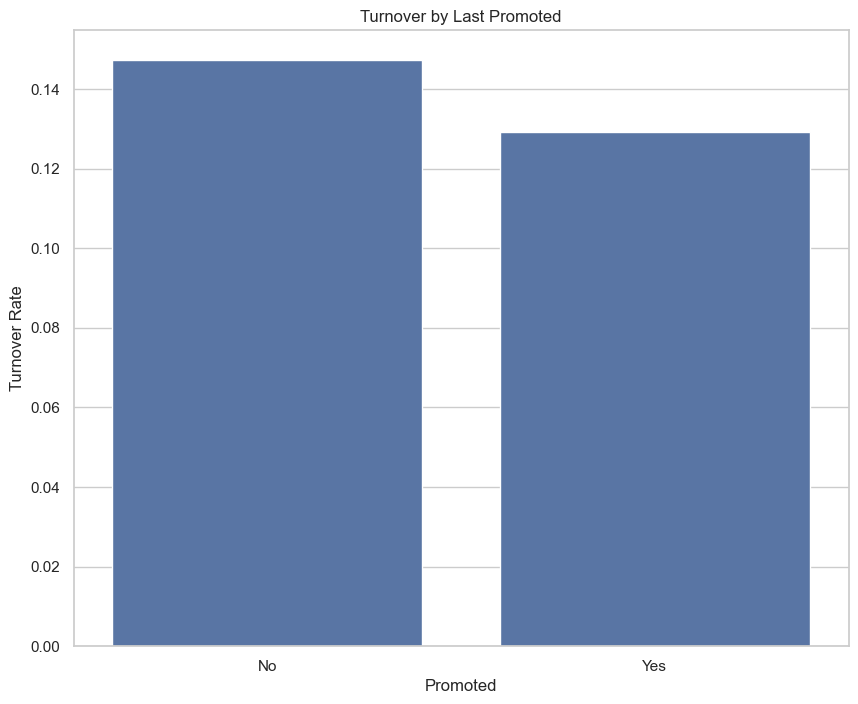

In [ ]:
promoted_turnover = people_df.groupby('Promoted_This_Year')['Turnover'].value_counts(normalize=True).unstack()["Yes"]
print(promoted_turnover)

plt.figure(figsize=(10,8))
sns.barplot(x=promoted_turnover.index, y=promoted_turnover)
plt.title("Turnover by Last Promoted")
plt.ylabel("Turnover Rate")
plt.xlabel("Promoted")
plt.show()

In [ ]:

# Assuming people_df is your DataFrame
# If not, replace people_df with the actual DataFrame name

# Create a new column 'TotalESI' in the DataFrame
people_df["TotalESI"] = (((people_df["ESI_1"] + people_df["ESI_2"] + people_df["ESI_3"]) / 3) - 1)/9

# Round the 'TotalESI' column to two decimal places
people_df["TotalESI"] = people_df["TotalESI"].round(2)

# Select relevant columns for the table
table_columns = ["EmployeID", "ESI_1", "ESI_2", "ESI_3", "TotalESI"]

# Create a new DataFrame with selected columns
esi_table = people_df[table_columns]

# Display the table
esi_table.head()


,EmployeID,ESI_1,ESI_2,ESI_3,TotalESI
0,BCGX7377,9,8,6,0.74
1,BCGX4795,8,10,9,0.89
2,BCGX4007,8,10,10,0.93
3,BCGX9524,7,9,8,0.78
4,BCGX8426,9,9,9,0.89


In [ ]:
# check the clumn of total ESC already on table

people_df.head()

,EmployeID,Gender,Age,Education,Department,Performance_Rating,Absent,Turnover,ESI_1,ESI_2,ESI_3,Promoted_This_Year,Complete_Training_Course,Training_Evaluation_Score,Min._Training_Eval_Pass_Score,Age_Bins,TotalESI
0,BCGX7377,Male,27,Master’s degree,Business Development,7.92,1,No,9,8,6,No,Yes,98,70,25-29,0.74
1,BCGX4795,Male,44,Higher education (Bachelor’s degree),Engineering,5.94,7,No,8,10,9,No,No,91,70,40-44,0.89
2,BCGX4007,Female,21,Higher education (Bachelor’s degree),Human Resources,9.90,0,No,8,10,10,Yes,No,62,70,20-24,0.93
3,BCGX9524,Male,47,Higher education (Bachelor’s degree),Business Development,9.90,5,No,7,9,8,Yes,No,77,70,45-49,0.78
4,BCGX8426,Female,46,Doctor of Philosophy (Ph.D.),Product Management,7.92,4,No,9,9,9,No,Yes,85,70,45-49,0.89


In [ ]:
people_df["TotalESI"]

0      0.74
1      0.89
2      0.93
3      0.78
4      0.89
       ... 
849    0.78
850    0.96
851    0.85
852    0.81
853    0.67
Name: TotalESI, Length: 854, dtype: float64

### 9. Find out the effect of job dissatisfaction.

Analyzing its impact of job dissatisfaction to driving of turnover. 

Department
Creative                0.807262
Finance                 0.798596
Legal                   0.796705
Human Resources         0.792388
Operations              0.789844
Product Management      0.787286
Marketing               0.784444
Sales                   0.772877
Business Development    0.772258
Data                    0.689722
Engineering             0.653281
Quality Assurance       0.640294
Name: TotalESI, dtype: float64


C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\93779040.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='TotalESI', data=sorted_df, palette='viridis', order=avg_total_esi_per_dept.index)


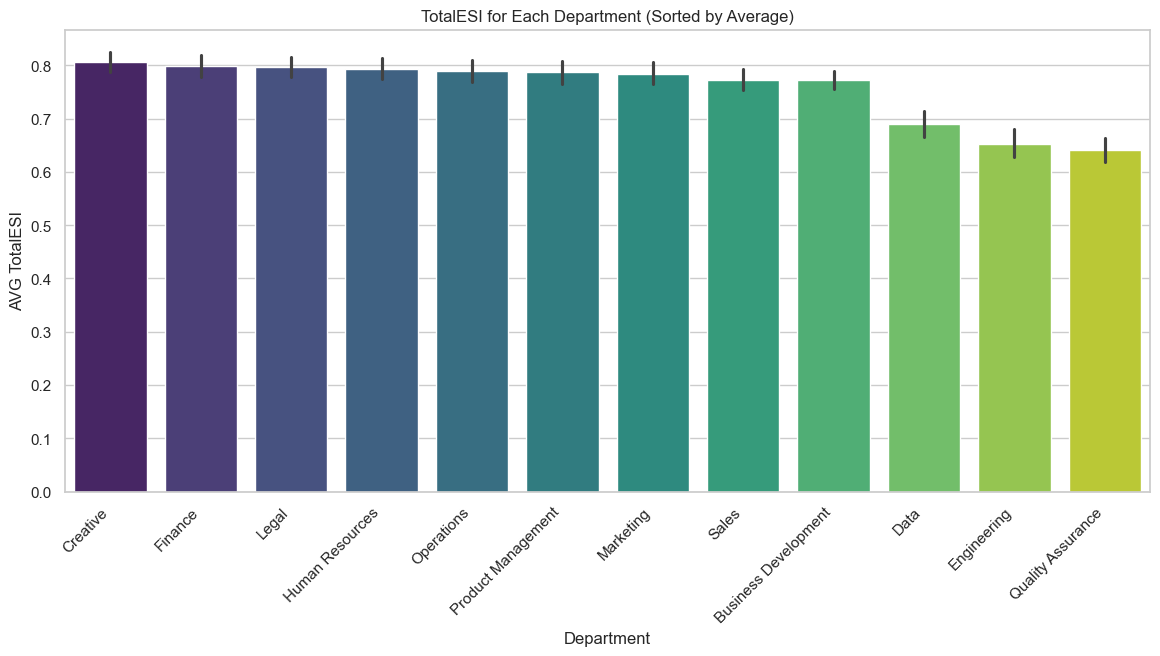

In [ ]:
# Calculate average TotalESI per department
avg_total_esi_per_dept = people_df.groupby('Department')['TotalESI'].mean().sort_values(ascending=False)
print(avg_total_esi_per_dept)

# Sort the DataFrame by the average TotalESI per department
sorted_df = people_df.sort_values(by=['Department', 'TotalESI'], ascending=[True, False])

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a bar chart for TotalESI sorted by department
plt.figure(figsize=(14, 6))
sns.barplot(x='Department', y='TotalESI', data=sorted_df, palette='viridis', order=avg_total_esi_per_dept.index)
plt.title('TotalESI for Each Department (Sorted by Average)')
plt.xlabel('Department')
plt.ylabel('AVG TotalESI')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

## Insights


1. Higher Education Impact
    Employees with a Doctor of Philosophy (Ph.D.) have the highest turnover rate (14.81%), followed by those with a Master's degree (16.79%). This suggests that employees with a high educational background may be more likely to be prone to leaving the company. Department Engineering and Data have higher rate of people leaving the company with high level of education.
    
2. Patterns Across Departments:
    Engineering and Data Department consistent exhibits turnover compared to other departments. 

3. Job satisfaction
    Turnover rates align with job satisfaction survey, indicating that departements with higher turnover rates, such as Data, Engineering, also have lower satisfaction survey among employees.

## Overall Insight:

The overall insight suggests that turnover is not only influenced by educational attainment but is significantly impacted by departmental dynamics. The alignment of turnover rates with job satisfaction survey results underscores the importance of addressing department-specific issues to enhance overall employee retention.

## Factors that might contribute to this problem

1. Industry Demand of Engineering and Data Fields
    The increasing demand for skillls in engineering and data fields can contribute to higher turnover rate, because some employee might be looking for another opportunity

2. Career Growth
    Employees in these high demand sectors may seek opportunity for continuous skill development and career growth

3. High Education and Opportunity
    Employees might leave the company to pursue advanced degrees or certifications that align with emerging trends in the industry.

4. Job Satisfaction
    Several department like engineering and data have lower job satisfaction and align with higher turnover rate. 


## Recommendations:

Note: We need another data to get insight about why engineering, data, and quality assurance have lower satisfaction level in company, becasue we can't understand the root causess for dissatisfaction. With limited resources of data, there are some recomendations for turnoever problem.

1. Engagement Surveys
    Conducting detailed engagement surveys within high-turnover departments can uncover deeper insights into the root causes of dissatisfaction and guide the development of tailored improvement initiatives.

2. Retention Strategies
    Implementing department-specific retention strategies, such as mentorship programs, professional development opportunities, or improved work-life balance, can help mitigate turnover in departments with higher attrition.

3. Communication and Feedback
    Encourage open communication and feedback mechanisms to allow employees to express concerns, suggestions, and feedback regarding their work environment, thereby fostering a culture of continuous improvement.




## Case Description

1. The HRD department receives many complaints about many employees leaving the company and complaints about poor employee performance.
2. Lead of People wants to prevent employee turnover as well as increase employee performance.
3. To resolve the problems, he assigned you to make a data product that helps him assess the problems.
4. Lead of People needs to assess:
    - a. How bad is the employee turnover? What factors might be the cause?
    - b. How bad is the employee performance? What factors might be the cause?
5. Lead of People asks you to provide a simple people analytics dashboard to help him assess the employee turnover and performance data.

## Objectives

The objective of this project is to analyze the provided data to assess employee turnover and performance. Additionally, a people analytics dashboard will be created to present key insights and assist the Lead of People in making informed decisions.




## Performance Analysis

a. Analyze performance ratings:
    Identify any patterns or trends in performance across different departments or education levels.
    
b. Identify Performance Factors:
    Explore factors like age, education, department, absenteesim, traning completion and promotion in relation perfomance



Questions

1. What is the distribution of performance ratting accross the organization?
2. Are there difference performance ratings between genders, departments, education, absenteesim?
3. Does completing traning courses correlate with higher performance?
4. Is there a difference between promotion and performance ratings?

In [ ]:
people_df.head()

,EmployeID,Gender,Age,Education,Department,Performance_Rating,Absent,Turnover,ESI_1,ESI_2,ESI_3,Promoted_This_Year,Complete_Training_Course,Training_Evaluation_Score,Min._Training_Eval_Pass_Score,Age_Bins,TotalESI
0,BCGX7377,Male,27,Master’s degree,Business Development,7.92,1,No,9,8,6,No,Yes,98,70,25-29,0.74
1,BCGX4795,Male,44,Higher education (Bachelor’s degree),Engineering,5.94,7,No,8,10,9,No,No,91,70,40-44,0.89
2,BCGX4007,Female,21,Higher education (Bachelor’s degree),Human Resources,9.90,0,No,8,10,10,Yes,No,62,70,20-24,0.93
3,BCGX9524,Male,47,Higher education (Bachelor’s degree),Business Development,9.90,5,No,7,9,8,Yes,No,77,70,45-49,0.78
4,BCGX8426,Female,46,Doctor of Philosophy (Ph.D.),Product Management,7.92,4,No,9,9,9,No,Yes,85,70,45-49,0.89


In [ ]:
people_df["Training_Pass"] = np.where(people_df["Training_Evaluation_Score"] > people_df["Min._Training_Eval_Pass_Score"], "Yes", "No")
people_df.head()

,EmployeID,Gender,Age,Education,Department,Performance_Rating,Absent,Turnover,ESI_1,ESI_2,ESI_3,Promoted_This_Year,Complete_Training_Course,Training_Evaluation_Score,Min._Training_Eval_Pass_Score,Age_Bins,TotalESI,Training_Pass
0,BCGX7377,Male,27,Master’s degree,Business Development,7.92,1,No,9,8,6,No,Yes,98,70,25-29,0.74,Yes
1,BCGX4795,Male,44,Higher education (Bachelor’s degree),Engineering,5.94,7,No,8,10,9,No,No,91,70,40-44,0.89,Yes
2,BCGX4007,Female,21,Higher education (Bachelor’s degree),Human Resources,9.90,0,No,8,10,10,Yes,No,62,70,20-24,0.93,No
3,BCGX9524,Male,47,Higher education (Bachelor’s degree),Business Development,9.90,5,No,7,9,8,Yes,No,77,70,45-49,0.78,Yes
4,BCGX8426,Female,46,Doctor of Philosophy (Ph.D.),Product Management,7.92,4,No,9,9,9,No,Yes,85,70,45-49,0.89,Yes


1. What is the distribution of performance ratting accross the organization?


In [ ]:
avg_performance = people_df["Performance_Rating"].mean()
print(f'Avg Employee Performance: {avg_performance:.2f} %')

Avg Employee Performance: 7.55 %


2. Are there difference performance ratings between genders or departments?

Average Performance Ratting 7.554156908665106
Department
Marketing               7.748148
Quality Assurance       7.733088
Creative                7.728810
Engineering             7.707500
Human Resources         7.696567
Business Development    7.665269
Legal                   7.578409
Finance                 7.499825
Product Management      7.438571
Data                    7.417222
Operations              7.281250
Sales                   7.134658
Name: Performance_Rating, dtype: float64


C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\2821038440.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= avg_performance_dept.index , y=avg_performance_dept, palette='viridis')


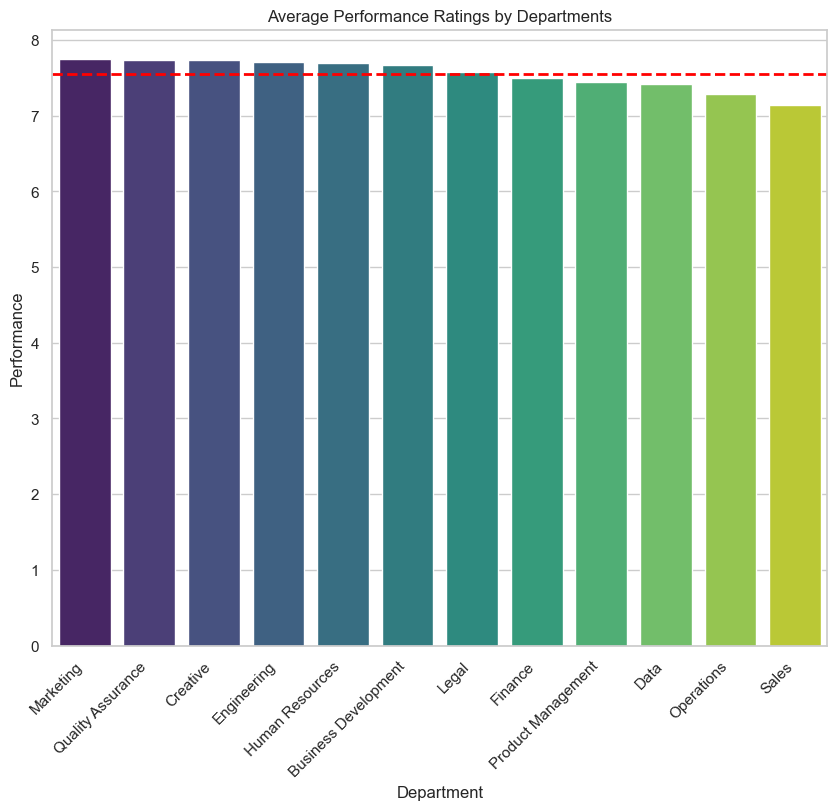

In [ ]:
# Performance ratings between departments
avg_performance_dept = people_df.groupby("Department")["Performance_Rating"].mean().sort_values(ascending=False)
print(f"Average Performance Ratting {avg_performance}")
print(avg_performance_dept)


plt.figure(figsize=(10, 8))
sns.barplot(x= avg_performance_dept.index , y=avg_performance_dept, palette='viridis')
plt.axhline(people_df['Performance_Rating'].mean(), color='red', linestyle='--', linewidth=2, label='Overall Mean')
plt.title("Average Performance Ratings by Departments")
plt.xlabel("Department")
plt.ylabel("Performance")
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

The average performance rating for the organization is 7.55%. 

The departments wigh higher than the average rattings include Marketing, Quality Assurance, Creative. On the other hand, Sales, Operations and Data exhibit performance bellow the mean. 
Because of this insight, I need further exploration into factors influencing performance within these departments.

C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\1275424812.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Absent', data=department_data, ax=ax, palette='viridis')
C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\1275424812.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Absent', data=department_data, ax=ax, palette='viridis')
C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\1275424812.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Absent', data=department_data, ax=ax, palette='viridis')


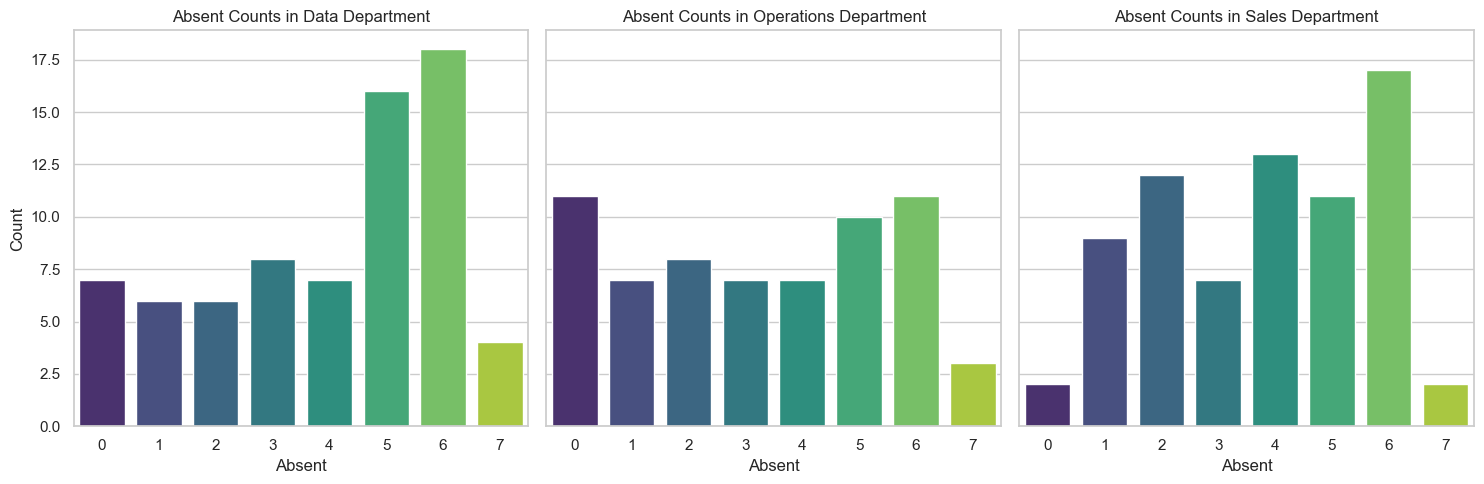

In [ ]:

# Filter data for the specified departments
selected_departments = ['Data', 'Operations', 'Sales']
filtered_data = people_df[people_df['Department'].isin(selected_departments)]

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create subplots for each department
fig, axes = plt.subplots(nrows=1, ncols=len(selected_departments), figsize=(15, 5), sharey=True)

# Loop through selected departments and create count plots
for i, department in enumerate(selected_departments):
    ax = axes[i]
    department_data = filtered_data[filtered_data['Department'] == department]
    
    # Create a count plot for each department
    sns.countplot(x='Absent', data=department_data, ax=ax, palette='viridis')
    
    ax.set_title(f'Absent Counts in {department} Department')
    ax.set_xlabel('Absent')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


I explore the the number of employee in Data, Operations and Sales Departments. 
It looks similar between the absenteeism of the sales, and data departments. But otherwise the operations departmen. I compared this absenteeism in other part in this analysis.

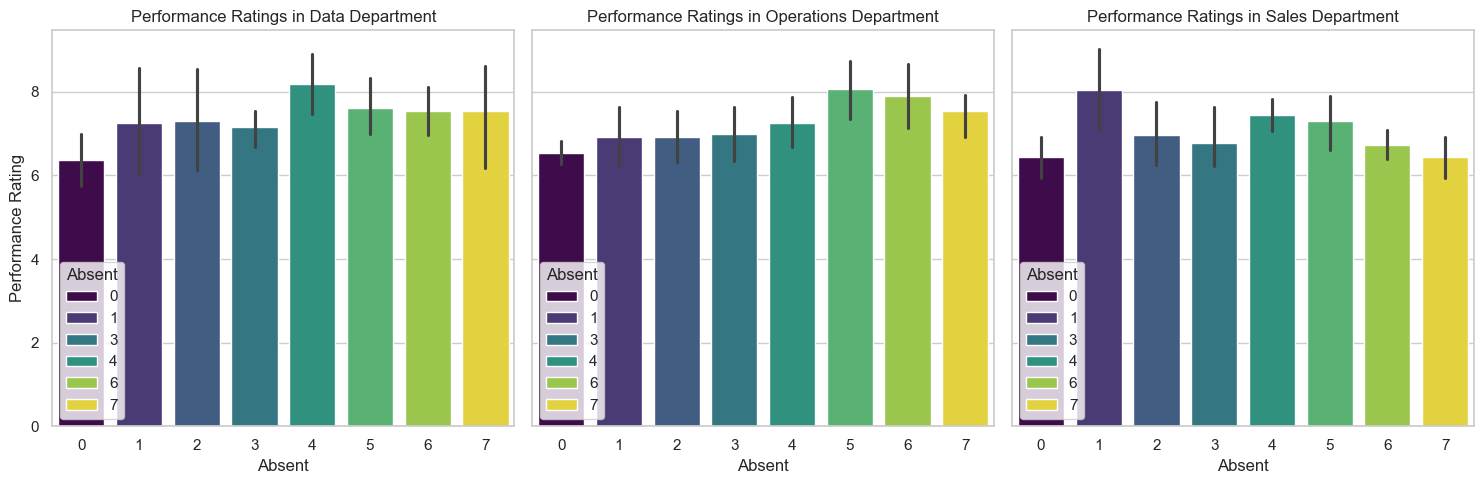

In [ ]:
# Filter data for the specified departments
selected_departments = ['Data', 'Operations', 'Sales']
filtered_data = people_df[people_df['Department'].isin(selected_departments)]

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create subplots for each department
fig, axes = plt.subplots(nrows=1, ncols=len(selected_departments), figsize=(15, 5), sharey=True)

# Loop through selected departments and create bar charts
for i, department in enumerate(selected_departments):
    ax = axes[i]
    department_data = filtered_data[filtered_data['Department'] == department]
    
    # Create a bar chart for each department
    sns.barplot(x='Absent', y='Performance_Rating', hue='Absent', data=department_data, ax=ax, palette='viridis')
    
    ax.set_title(f'Performance Ratings in {department} Department')
    ax.set_xlabel('Absent')
    ax.set_ylabel('Performance Rating')
    # ax.legend(title='Complete Training Course', loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


This is the performance rating based on absenteeism.
It can be seen that the data and operations departmenes have a slightly increased average performance for those with more than 4 absenteeism, but this it not the same situation on sales departmen.

Need further analysis on the effect of absenteeism  on performance ratting.

C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\3573577628.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Complete_Training_Course', data=department_data, ax=ax, palette={'Yes': 'blue', 'No': 'orange'})
C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\3573577628.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Complete_Training_Course', data=department_data, ax=ax, palette={'Yes': 'blue', 'No': 'orange'})
C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\3573577628.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot

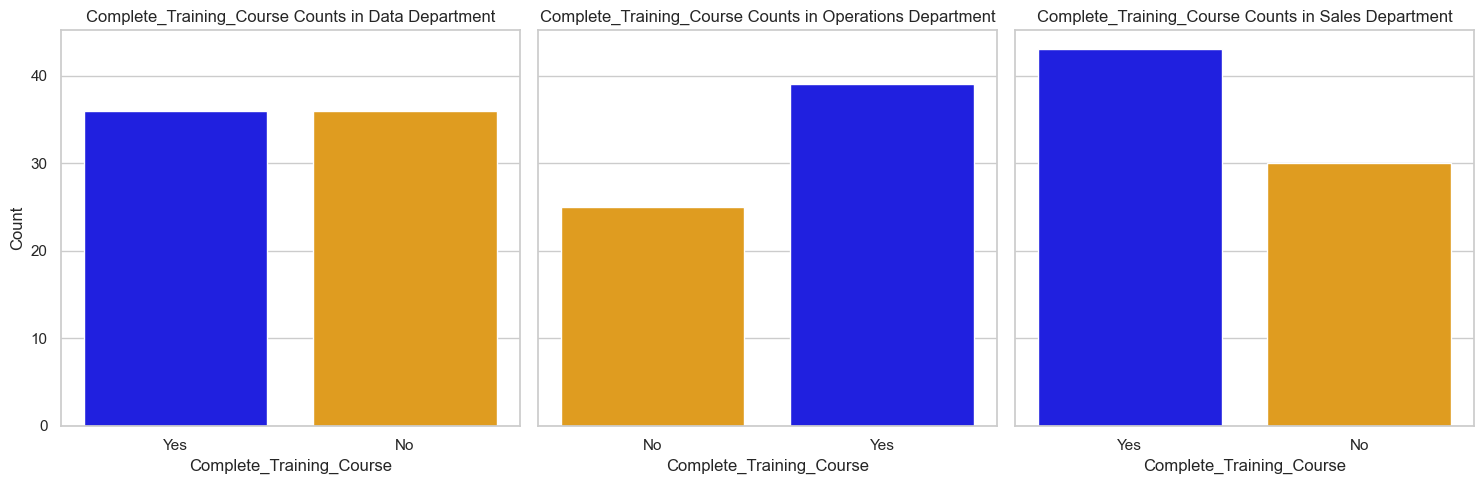

In [ ]:

# Filter data for the specified departments
selected_departments = ['Data', 'Operations', 'Sales']
filtered_data = people_df[people_df['Department'].isin(selected_departments)]

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create subplots for each department
fig, axes = plt.subplots(nrows=1, ncols=len(selected_departments), figsize=(15, 5), sharey=True)

# Loop through selected departments and create count plots
for i, department in enumerate(selected_departments):
    ax = axes[i]
    department_data = filtered_data[filtered_data['Department'] == department]
    
    # Create a count plot for each department
    sns.countplot(x='Complete_Training_Course', data=department_data, ax=ax, palette={'Yes': 'blue', 'No': 'orange'})
    
    ax.set_title(f'Complete_Training_Course Counts in {department} Department')
    ax.set_xlabel('Complete_Training_Course')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


I explored the the number of employee who completed the traning courses
There is no significant difference, sales and operations departments has higher employees completed the traning courses, but in data department the number of employee completed the courses and not completed the courses its quite simmilar.

I need to explore the performance rating, is it a significant performance when employee completed the courses?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


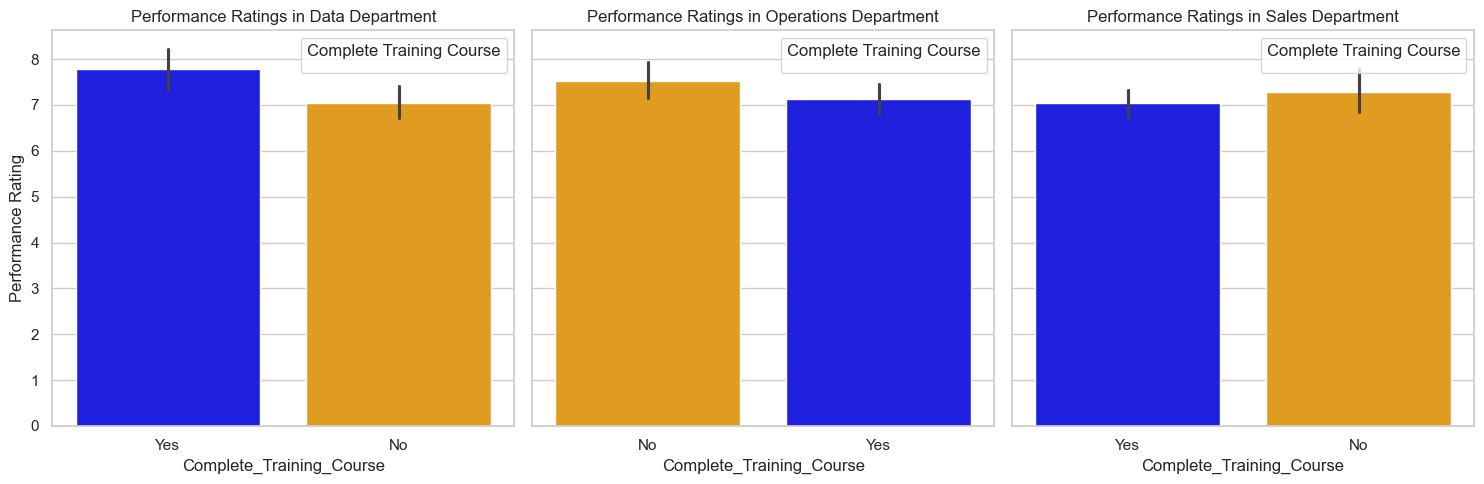

In [ ]:
# Filter data for the specified departments
selected_departments = ['Data', 'Operations', 'Sales']
filtered_data = people_df[people_df['Department'].isin(selected_departments)]

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create subplots for each department
fig, axes = plt.subplots(nrows=1, ncols=len(selected_departments), figsize=(15, 5), sharey=True)

# Loop through selected departments and create bar charts
for i, department in enumerate(selected_departments):
    ax = axes[i]
    department_data = filtered_data[filtered_data['Department'] == department]
    
    # Create a bar chart for each department
    sns.barplot(x='Complete_Training_Course', y='Performance_Rating', hue='Complete_Training_Course', data=department_data, ax=ax, palette={'Yes': 'blue', 'No': 'orange'})
    
    ax.set_title(f'Performance Ratings in {department} Department')
    ax.set_xlabel('Complete_Training_Course')
    ax.set_ylabel('Performance Rating')
    ax.legend(title='Complete Training Course', loc='upper right')

plt.tight_layout()
plt.show()


This is the performance ratings when employee completed and not completed the courses.

From the data above, its found that employee who complete their traning courses have lower scores, this occurs in the opration and sales departments, on the other hand in sales department.

I will explore all departments

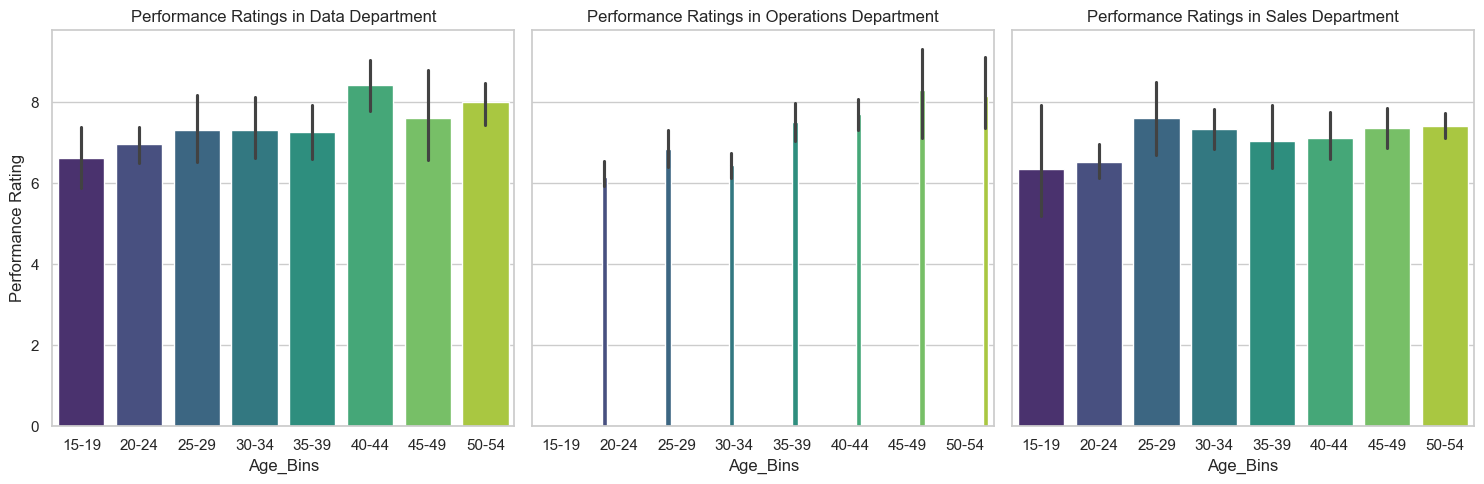

In [ ]:
# Filter data for the specified departments
selected_departments = ['Data', 'Operations', 'Sales']
filtered_data = people_df[people_df['Department'].isin(selected_departments)]

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create subplots for each department
fig, axes = plt.subplots(nrows=1, ncols=len(selected_departments), figsize=(15, 5), sharey=True)

# Loop through selected departments and create bar charts
for i, department in enumerate(selected_departments):
    ax = axes[i]
    department_data = filtered_data[filtered_data['Department'] == department]
    
    # Create a bar chart for each department
    sns.barplot(x='Age_Bins', y='Performance_Rating', hue='Age_Bins', data=department_data, ax=ax, palette='viridis')
    
    ax.set_title(f'Performance Ratings in {department} Department')
    ax.set_xlabel('Age_Bins')
    ax.set_ylabel('Performance Rating')
    # ax.legend(title='Complete Training Course', loc='upper right')

plt.tight_layout()
plt.show()


This is the performance ratings by age.
As we can see that performance below age 25 is the lowest performance than other age, this could be caused by the lack of experience based on age.

C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\1651551202.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Training_Pass', data=department_data, ax=ax, palette={'Yes': 'blue', 'No': 'orange'})
C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\1651551202.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Training_Pass', data=department_data, ax=ax, palette={'Yes': 'blue', 'No': 'orange'})
C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\1651551202.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Training_Pass', da

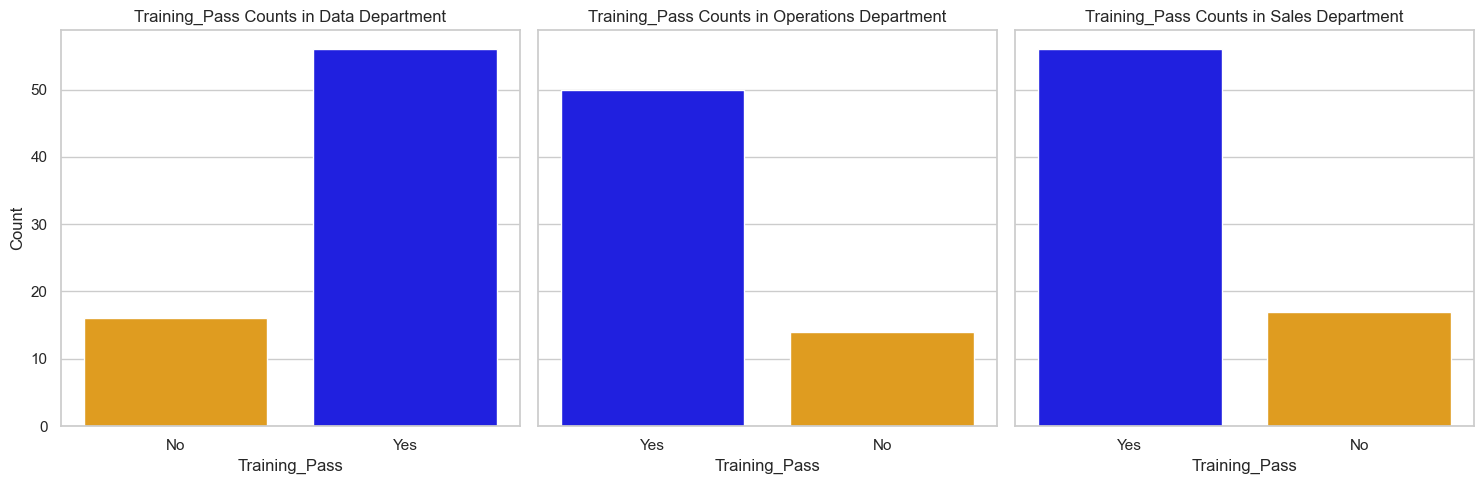

In [ ]:

# Filter data for the specified departments
selected_departments = ['Data', 'Operations', 'Sales']
filtered_data = people_df[people_df['Department'].isin(selected_departments)]

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create subplots for each department
fig, axes = plt.subplots(nrows=1, ncols=len(selected_departments), figsize=(15, 5), sharey=True)

# Loop through selected departments and create count plots
for i, department in enumerate(selected_departments):
    ax = axes[i]
    department_data = filtered_data[filtered_data['Department'] == department]
    
    # Create a count plot for each department
    sns.countplot(x='Training_Pass', data=department_data, ax=ax, palette={'Yes': 'blue', 'No': 'orange'})
    
    ax.set_title(f'Training_Pass Counts in {department} Department')
    ax.set_xlabel('Training_Pass')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


Almost all the employee in data, ops, and sales pass the traning evaluation company.
But the average performance in barchart below, showed that there is no significant difference between the employees who pass the traning and not passed.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


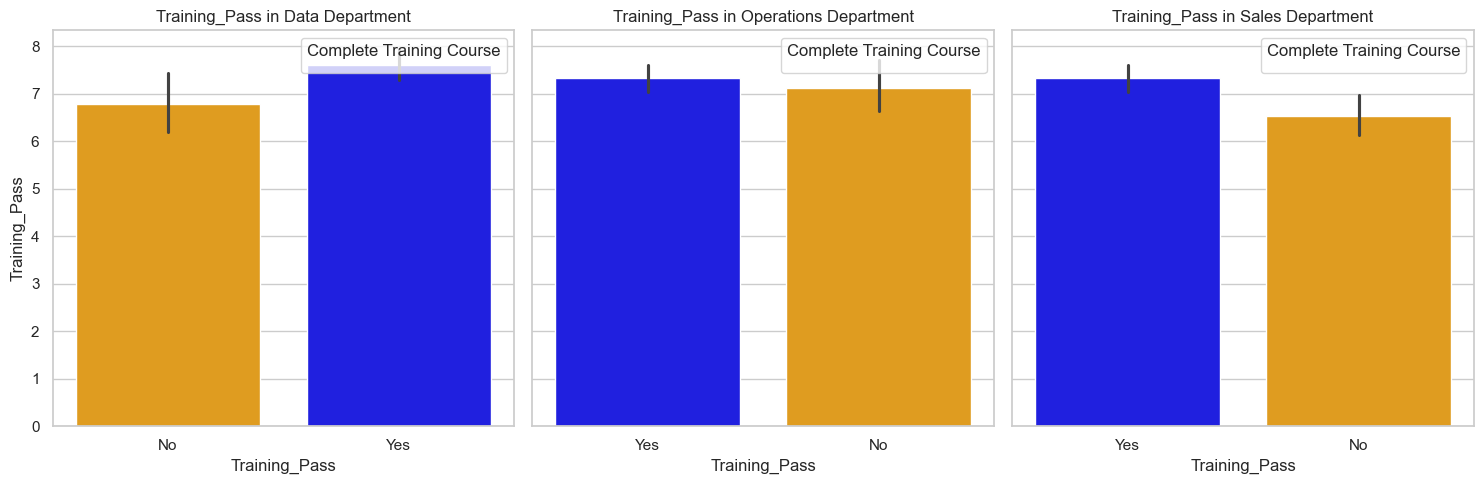

In [ ]:
# Filter data for the specified departments
selected_departments = ['Data', 'Operations', 'Sales']
filtered_data = people_df[people_df['Department'].isin(selected_departments)]

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create subplots for each department
fig, axes = plt.subplots(nrows=1, ncols=len(selected_departments), figsize=(15, 5), sharey=True)

# Loop through selected departments and create bar charts
for i, department in enumerate(selected_departments):
    ax = axes[i]
    department_data = filtered_data[filtered_data['Department'] == department]
    
    # Create a bar chart for each department
    sns.barplot(x='Training_Pass', y='Performance_Rating', hue='Training_Pass', data=department_data, ax=ax,  palette={'Yes': 'blue', 'No': 'orange'})
    
    ax.set_title(f'Training_Pass in {department} Department')
    ax.set_xlabel('Training_Pass')
    ax.set_ylabel('Training_Pass')
    ax.legend(title='Complete Training Course', loc='upper right')

plt.tight_layout()
plt.show()


Gender
Male      7.682122
Female    7.435991
Name: Performance_Rating, dtype: float64


C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\4225232099.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= avg_performance_gender.index, y=avg_performance_gender, palette={'Male': 'blue', 'Female': 'orange'})


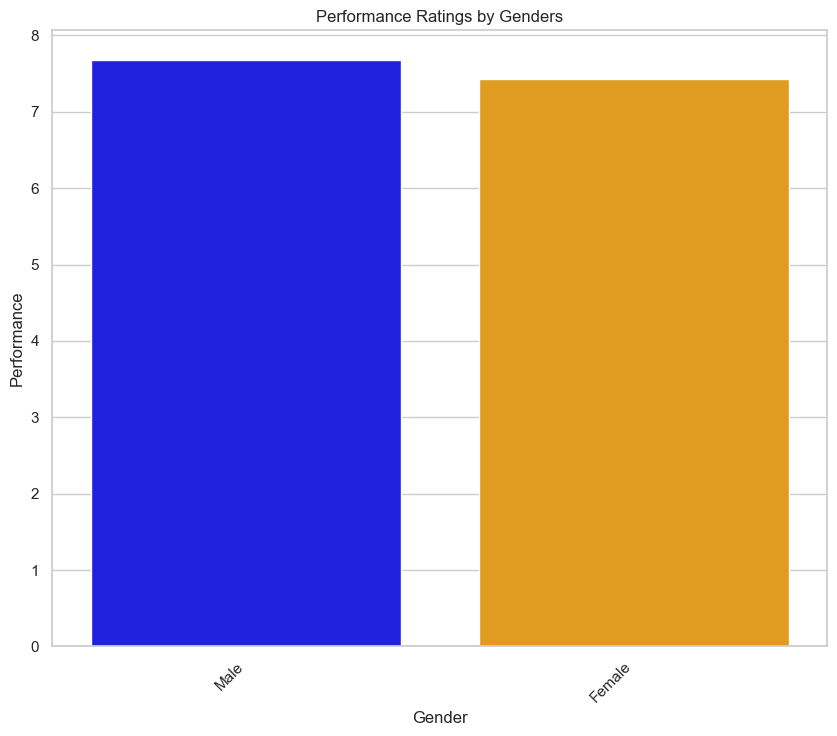

In [ ]:
# Performance ratings between genders
avg_performance_gender = people_df.groupby("Gender")["Performance_Rating"].mean().sort_values(ascending=False)

print(avg_performance_gender)


plt.figure(figsize=(10,8))
sns.barplot(x= avg_performance_gender.index, y=avg_performance_gender, palette={'Male': 'blue', 'Female': 'orange'})
plt.title("Performance Ratings by Genders")
plt.xlabel("Gender")
plt.ylabel("Performance")
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

The average rating for male ralatively higher than female, but its just slightly higher comparet to female.

C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\3895256269.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_performance_age = people_df.groupby("Age_Bins")["Performance_Rating"].mean().sort_values(ascending=False)


Age_Bins
40-44    7.938361
45-49    7.888978
50-54    7.841389
35-39    7.576250
30-34    7.447200
25-29    7.368681
20-24    7.157460
15-19    6.744000
Name: Performance_Rating, dtype: float64


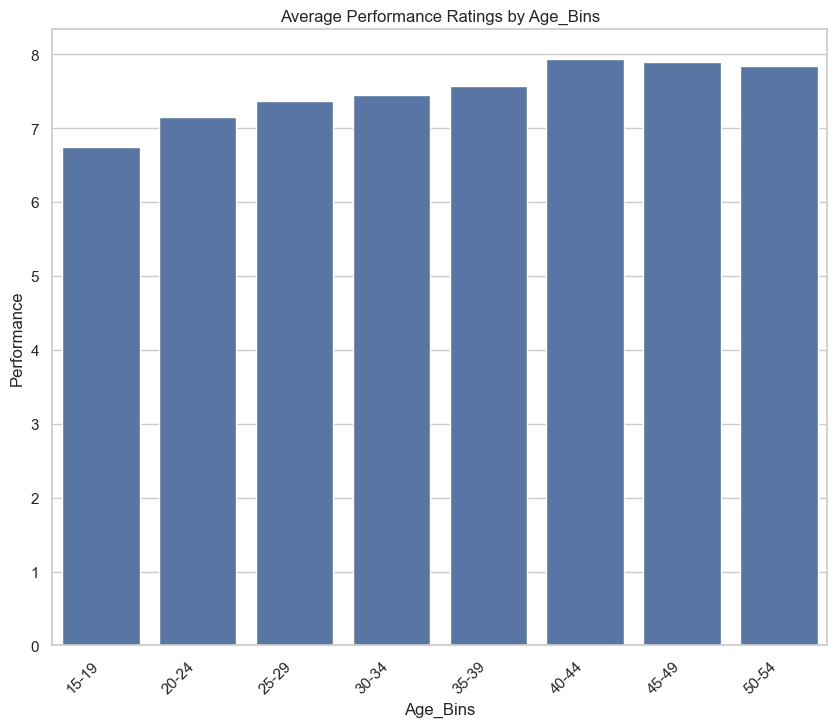

In [ ]:
# Performance ratings between Age_Bins
avg_performance_age = people_df.groupby("Age_Bins")["Performance_Rating"].mean().sort_values(ascending=False)
print(avg_performance_age)


plt.figure(figsize=(10, 8))
sns.barplot(x= avg_performance_age.index , y=avg_performance_age)
plt.title("Average Performance Ratings by Age_Bins")
plt.xlabel("Age_Bins")
plt.ylabel("Performance")
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

This is the average performance by the age.

There is a pattern that the performance ratings increasing with age.
This possibly caused by the experience and expertiese, older employees may have more work experience in their roles and contributing to higher performance. And younger employees may stil be in the arly stages of their careers, need skill developement

Education
Higher education (Bachelor’s degree)    7.666400
Doctor of Philosophy (Ph.D.)            7.596019
Secondary education                     7.511609
Primary education                       7.482404
Master’s degree                         7.467643
Name: Performance_Rating, dtype: float64


C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\268253821.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= avg_performance_edu.index , y=avg_performance_edu, palette='viridis')


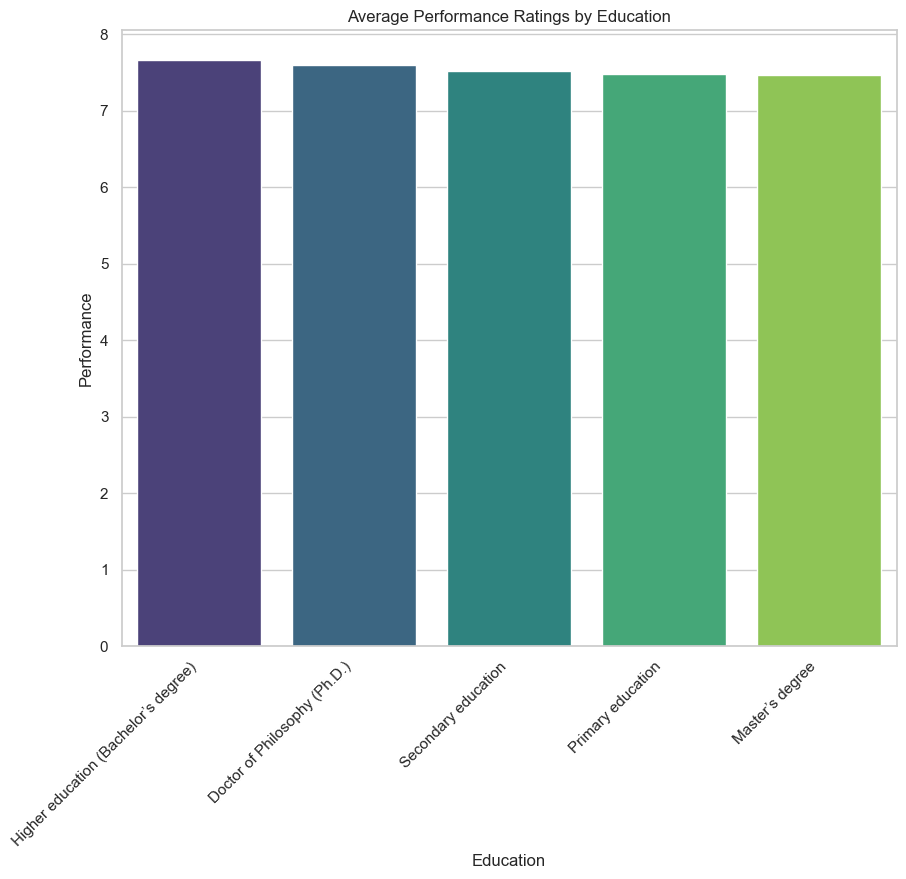

In [ ]:
# Performance ratings between Education
avg_performance_edu = people_df.groupby("Education")["Performance_Rating"].mean().sort_values(ascending=False)
print(avg_performance_edu)


plt.figure(figsize=(10, 8))
sns.barplot(x= avg_performance_edu.index , y=avg_performance_edu, palette='viridis')
plt.title("Average Performance Ratings by Education")
plt.xlabel("Education")
plt.ylabel("Performance")
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

The performance rating by education showed that higher education levels do not always translate to higher performance ratings.

Absent
0    7.290260
1    7.487778
2    7.431392
3    7.388750
4    7.467556
5    7.779096
6    7.577716
7    7.924035
Name: Performance_Rating, dtype: float64


C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\3938282375.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= avg_performance_absent.index , y=avg_performance_absent, palette='viridis')


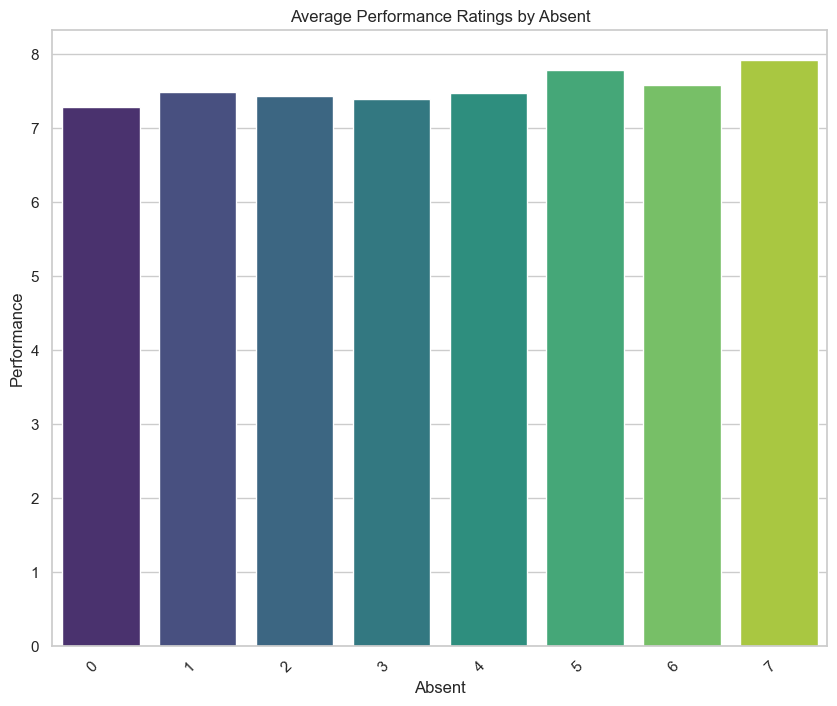

In [ ]:
# Performance ratings between Absent
avg_performance_absent = people_df.groupby("Absent")["Performance_Rating"].mean()
print(avg_performance_absent)


plt.figure(figsize=(10, 8))
sns.barplot(x= avg_performance_absent.index , y=avg_performance_absent, palette='viridis')
plt.title("Average Performance Ratings by Absent")
plt.xlabel("Absent")
plt.ylabel("Performance")
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

The analysis of performance ratings in relation to absenteeism suggests a fluctuating pattern.

The data suggests that employees with a more than five absences have the highest average performance rating. The observed performance pattern might be influenced by employees taking absences to allow for more time to recharge or relax. But still this is a preliminary observation and need further data and analysis to understand the factors contributing these patterns.

C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\3048889860.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Absent', data=department_data, ax=ax, palette='viridis')
C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\3048889860.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Absent', data=department_data, ax=ax, palette='viridis')
C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\3048889860.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Absent', data=department_data, ax=ax, palette='viridis')
C:\Users\ferna\AppD

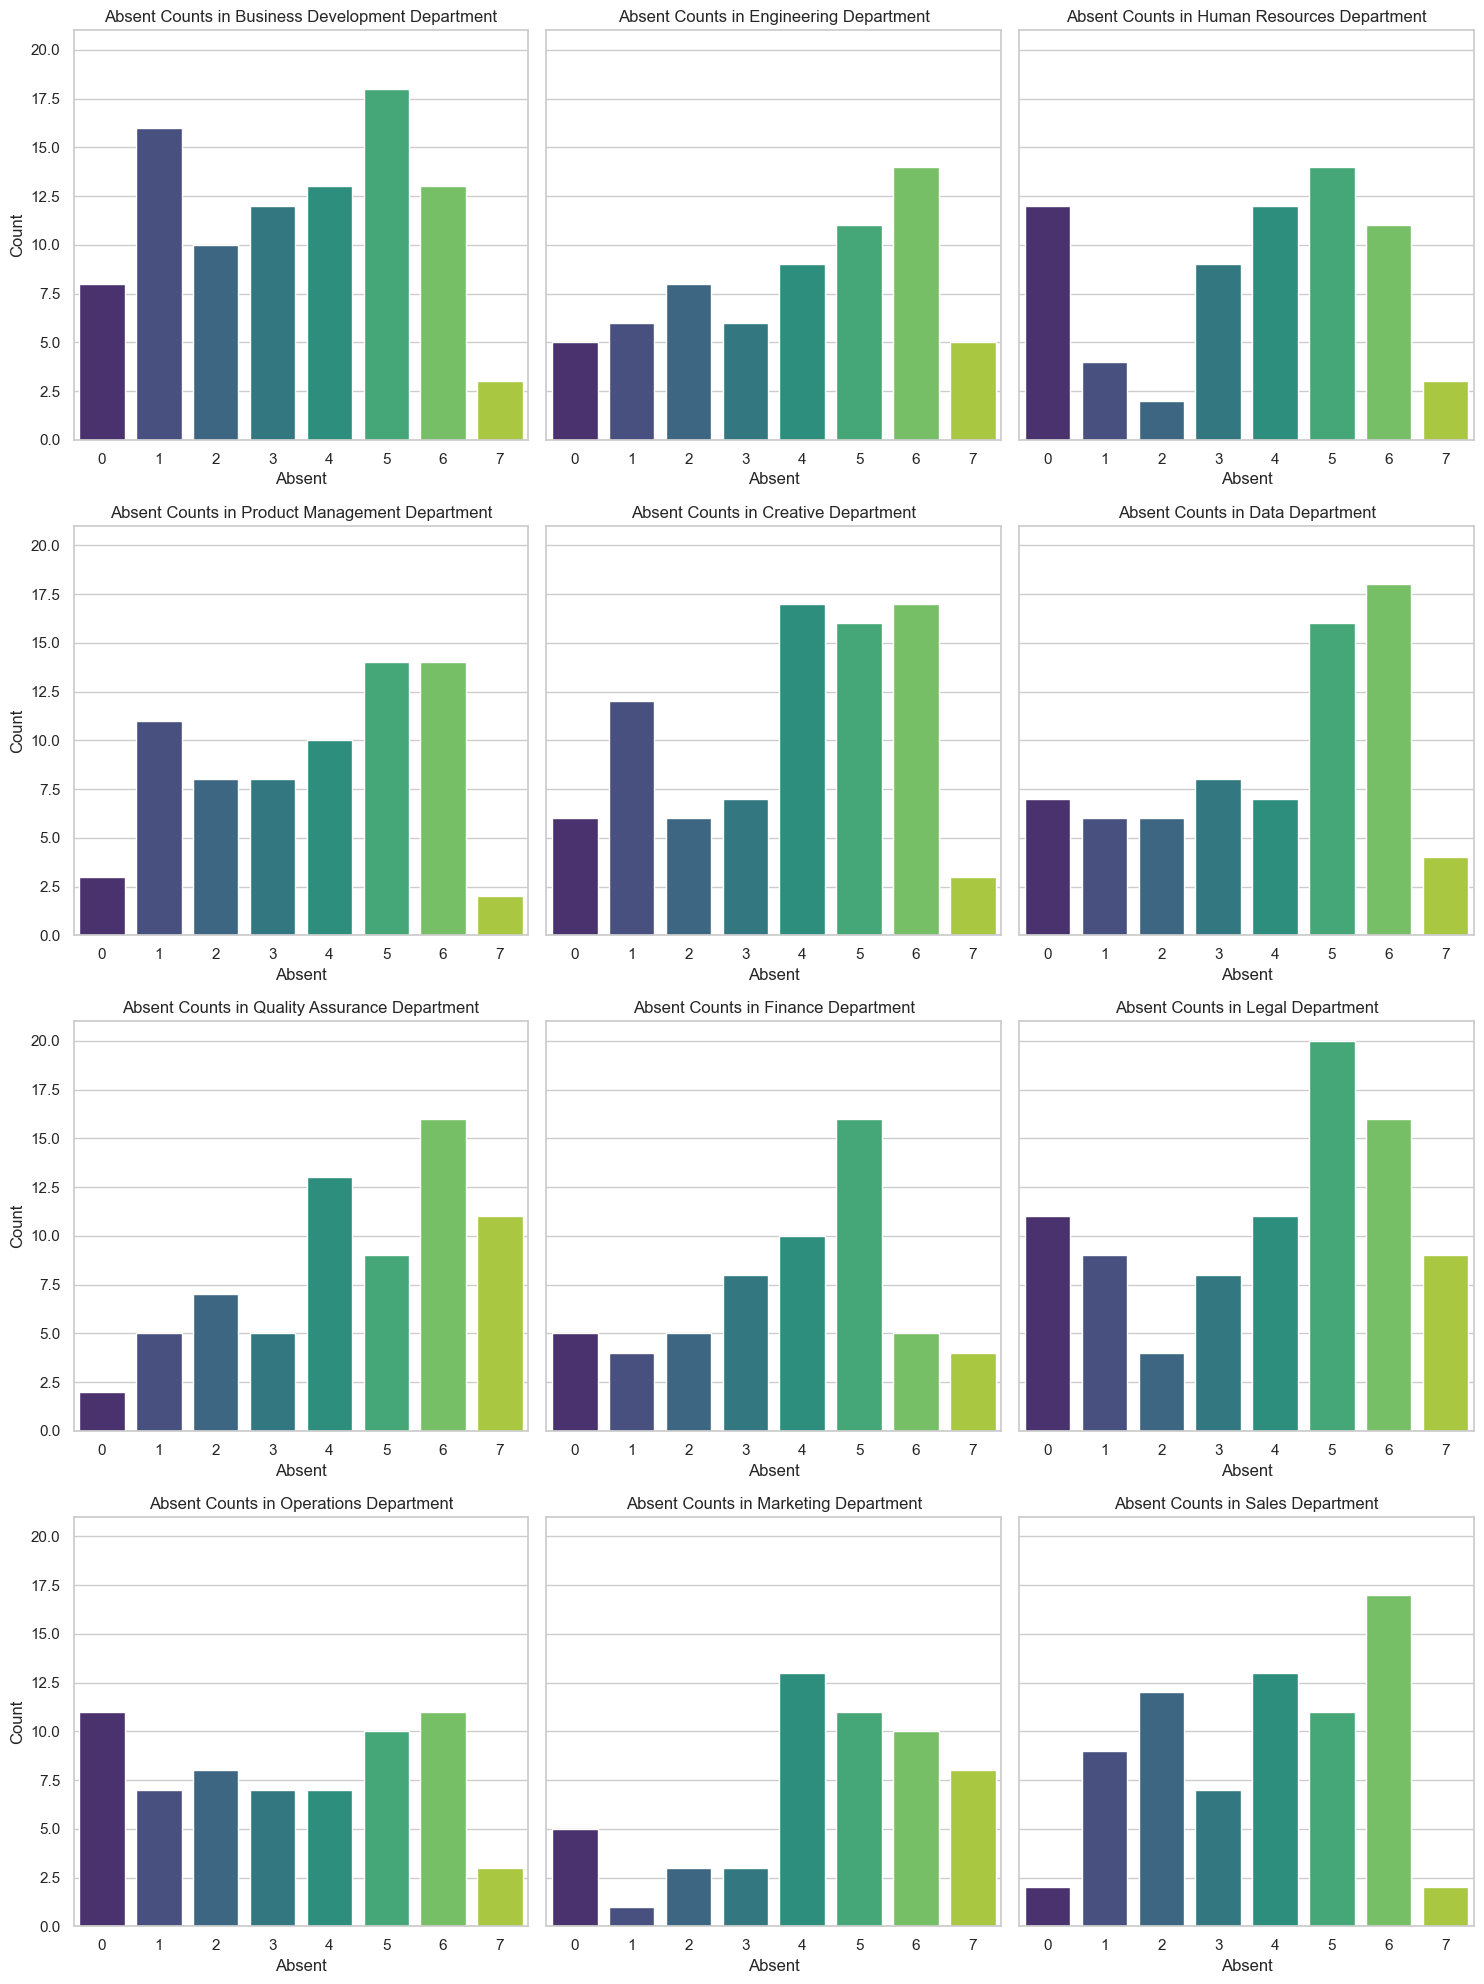

In [ ]:

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Get unique departments
unique_departments = people_df['Department'].unique()

# Calculate the number of rows and columns for subplots
num_rows = len(unique_departments) // 3
num_cols = 3

# Create subplots for each department
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows), sharey=True)

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through all unique departments and create count plots
for i, department in enumerate(unique_departments):
    ax = axes[i]
    department_data = people_df[people_df['Department'] == department]
    
    # Create a count plot for each department
    sns.countplot(x='Absent', data=department_data, ax=ax, palette='viridis')
    
    ax.set_title(f'Absent Counts in {department} Department')
    ax.set_xlabel('Absent')
    ax.set_ylabel('Count')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


The pattern across departmetns showed that majority of employee in each department tend to have absenteeism more than 4, indicating a consistent pattern of taking leaves. 

However, its intresting to note that departments such as ops, legal and sales have some employees who report no absences.

This insight suggests that certain departments might benefit from encouraging employees to utilize their allocated leave days. It could be beneficial for these departments to actively promote and support a healthy work-life balance, fostering an environment where employees feel encouraged to take necessary breaks when needed.  This approach may contribute to overall well-being and potentially enhance employee performance and satisfaction

3. Are there any difference between employee with completing thaining courses and their performance?

Complete_Training_Course
Yes    7.628537
No     7.449606
Name: Performance_Rating, dtype: float64


C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\2333148270.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= avg_performance_complete_training_course.index , y=avg_performance_complete_training_course, palette='viridis')


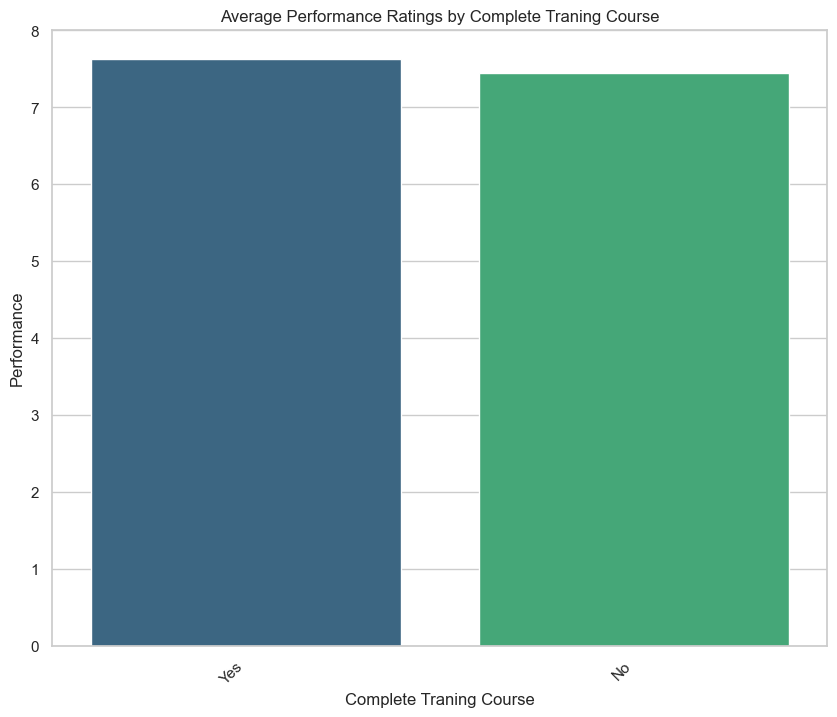

In [ ]:
# Recall Performance by Departments


# Performance ratings between Complete Traning Course
avg_performance_complete_training_course = people_df.groupby("Complete_Training_Course")["Performance_Rating"].mean().sort_values(ascending=False)
print(avg_performance_complete_training_course)


plt.figure(figsize=(10, 8))
sns.barplot(x= avg_performance_complete_training_course.index , y=avg_performance_complete_training_course, palette='viridis')
plt.title("Average Performance Ratings by Complete Traning Course")
plt.xlabel("Complete Traning Course")
plt.ylabel("Performance")
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

The defference between employee who completed the traning course and not completed the course is not that significant.

In [ ]:
people_df["Performance_Rating"].describe()

count    854.000000
mean       7.554157
std        1.247926
min        5.090000
25%        6.930000
50%        7.570000
75%        8.320000
max        9.900000
Name: Performance_Rating, dtype: float64

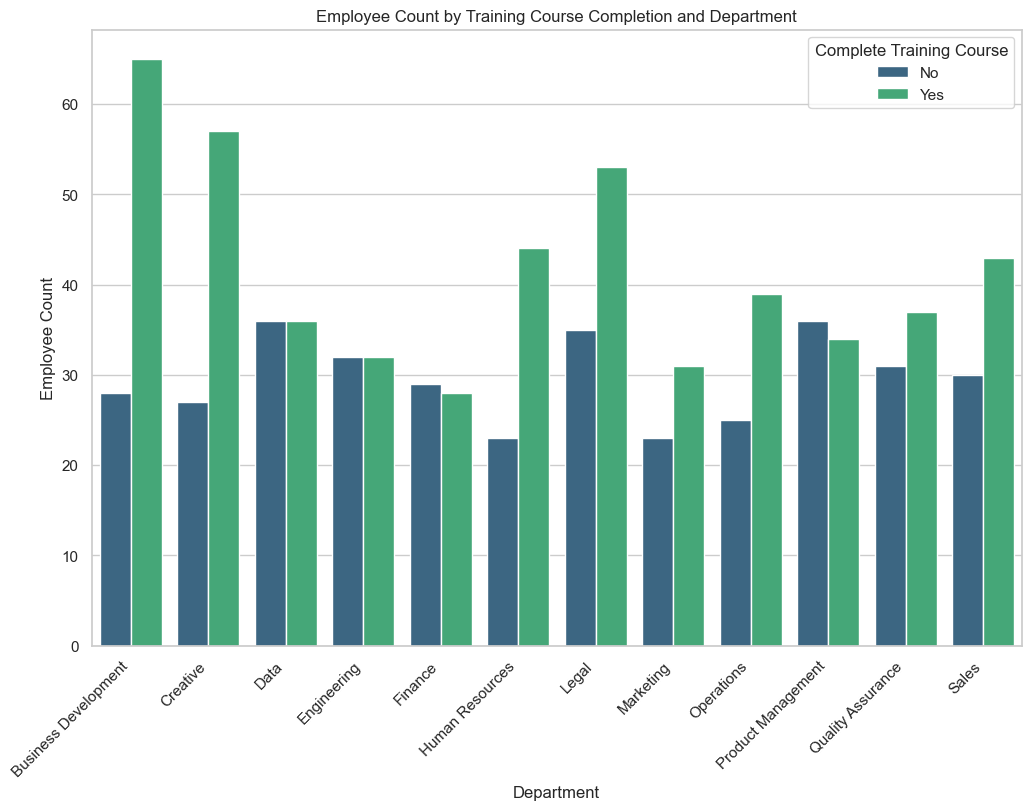

In [ ]:
# Exploring the percentage of Training completion rate
# Traning completion rate  = Employee Completed Traning / All Employee

# Convert 'Complete_Training_Course' boolean values to strings 'Yes' and 'No'
# people_df['Complete_Training_Course'] = people_df['Complete_Training_Course'].map({True: 'Yes', False: 'No'})

# Group by 'Department' and 'Complete_Training_Course' and calculate the count of employees
count_performance_traning_complete = people_df.groupby(['Department', 'Complete_Training_Course'])['EmployeID'].count().reset_index()
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Department', y='EmployeID', hue='Complete_Training_Course', data=count_performance_traning_complete, palette='viridis')
plt.title('Employee Count by Training Course Completion and Department')
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.legend(title='Complete Training Course', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

The distribution of employee completion course across departments almost equal of employee who have and have not completed the training. 

This suggests an opportunity the company to encourage and motivate employees to participate in and complete the training programs.

Department
Marketing               7.748148
Quality Assurance       7.733088
Creative                7.728810
Engineering             7.707500
Human Resources         7.696567
Business Development    7.665269
Legal                   7.578409
Finance                 7.499825
Product Management      7.438571
Data                    7.417222
Operations              7.281250
Sales                   7.134658
Name: Performance_Rating, dtype: float64


C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\1101977514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= avg_performance_dept.index , y=avg_performance_dept, palette='viridis')


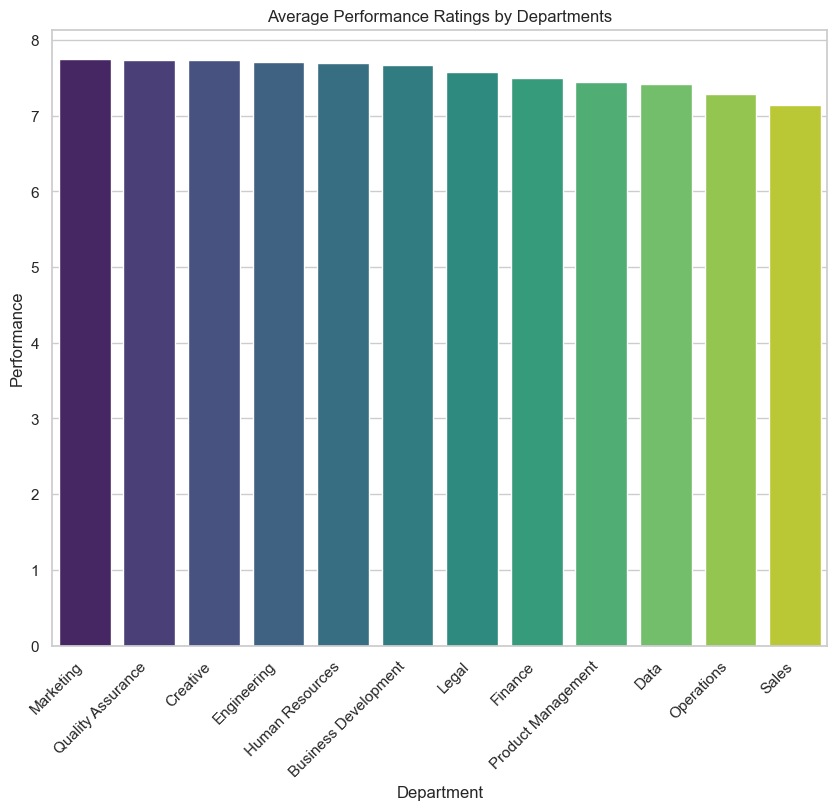

In [ ]:
# Recall Performance by Departments


# Performance ratings between departments
avg_performance_dept = people_df.groupby("Department")["Performance_Rating"].mean().sort_values(ascending=False)
print(avg_performance_dept)


plt.figure(figsize=(10, 8))
sns.barplot(x= avg_performance_dept.index , y=avg_performance_dept, palette='viridis')
plt.title("Average Performance Ratings by Departments")
plt.xlabel("Department")
plt.ylabel("Performance")
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

Training_Pass
No     7.246620
Yes    7.658276
Name: Performance_Rating, dtype: float64


C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\2703203861.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= avg_performance_Training_Pass.index , y=avg_performance_Training_Pass, palette={'Yes': 'blue', 'No': 'orange'})


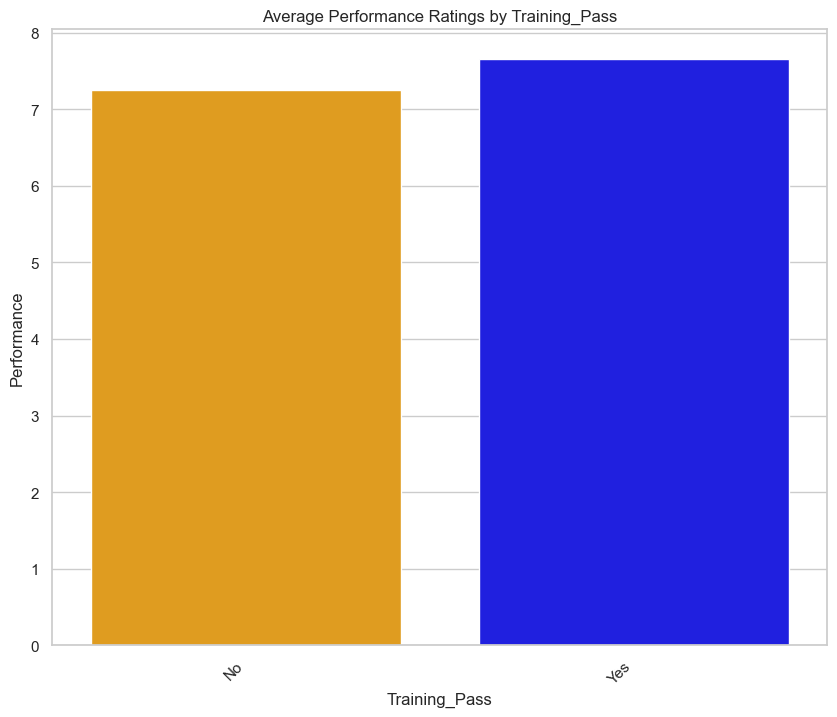

In [ ]:
# Performance ratings between Training_Pass
avg_performance_Training_Pass = people_df.groupby("Training_Pass")["Performance_Rating"].mean()
print(avg_performance_Training_Pass)


plt.figure(figsize=(10, 8))
sns.barplot(x= avg_performance_Training_Pass.index , y=avg_performance_Training_Pass, palette={'Yes': 'blue', 'No': 'orange'})
plt.title("Average Performance Ratings by Training_Pass")
plt.xlabel("Training_Pass")
plt.ylabel("Performance")
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

The graph showed that employee who passed the training have higher performance compared to those who did not.

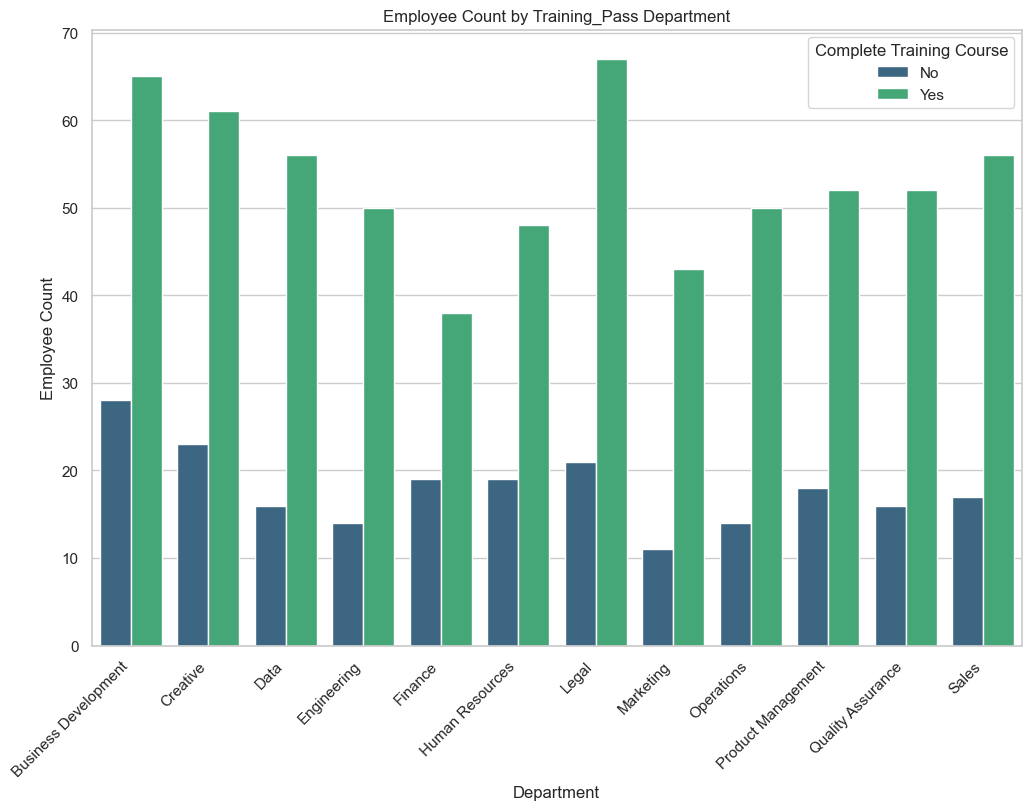

In [ ]:
# Group by 'Department' and 'Training_Pass' and calculate the count of employees
count_performance_traning_pass = people_df.groupby(['Department', 'Training_Pass'])['EmployeID'].count().reset_index()
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Department', y='EmployeID', hue='Training_Pass', data=count_performance_traning_pass, palette='viridis')
plt.title('Employee Count by Training_Pass Department')
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.legend(title='Complete Training Course', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()


4. Is there a difference between promotion and performance ratings?

Promoted_This_Year
No     7.571621
Yes    7.532269
Name: Performance_Rating, dtype: float64


C:\Users\ferna\AppData\Local\Temp\ipykernel_31968\1038589954.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= avg_performance_Promoted_This_Year.index , y=avg_performance_Promoted_This_Year, palette={'Yes': 'blue', 'No': 'orange'})


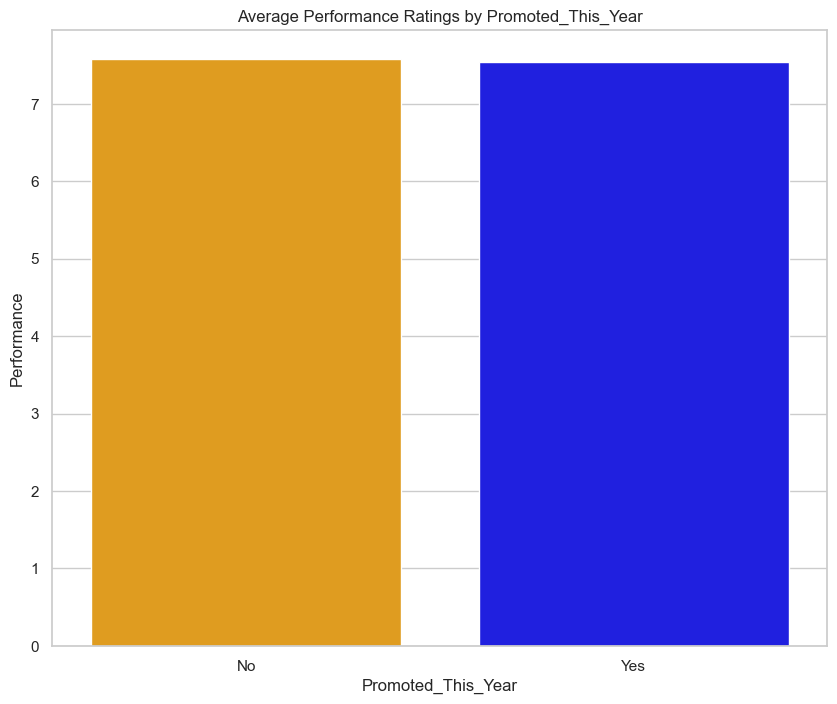

In [ ]:
# Performance ratings between Promoted_This_Year
avg_performance_Promoted_This_Year = people_df.groupby("Promoted_This_Year")["Performance_Rating"].mean()
print(avg_performance_Promoted_This_Year)


plt.figure(figsize=(10, 8))
sns.barplot(x= avg_performance_Promoted_This_Year.index , y=avg_performance_Promoted_This_Year, palette={'Yes': 'blue', 'No': 'orange'})
plt.title("Average Performance Ratings by Promoted_This_Year")
plt.xlabel("Promoted_This_Year")
plt.ylabel("Performance")
# plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

The performance based on employees promoted shows a slight difference. Employees who were not promoted have slightly higher performance rate compared to those who were promoted.

## Insights

1. Overal Performance Rating
    The average performance rating for the company is 7.55 %, indication a good performance in company.

2. Performance Rating by Department
    The performance ratings vary across departments, with Marketing, Quality Assurance, and Creative having higher ratings, while Data, Operations, and Sales exhibit lower ratings compared to the overall average.

3. Gender Disparity?
    No, incase of males on average, have a slightly higher performance rating (7.68) compared to females (7.44) but it's not indicating that there is a gender disparity in company.

4. Age and Performance
    Performance ratings show a increasing trend with age, suggesting that older employees tend to have higher performance ratings.

5. Education Level and Performance
    Higher education level not always translate to higher performance ratings.

6. Absenteeism and Performance
    Higher absenteeism indicating a better performance ratings compared the employee has lower absenteeism. As the number of absent days increases, so does the average performance rating.

7. Traning Completion and Performance
    Employee who completed traning courses have a slihghtly higher average performance rating compared to those who did not. However the difference isn't significant.

    Another insight is that the distribution of employee completion course across departments almost equal of employee who have and have not completed the training. 


8. Promotion and Performance
    Exmployee who were not promoted during the year have a slightly hiher average performance rating thatn those who promoted.




## Overall Insight

The company on average, demonstrates good perforamnce ratings, attention to specific departments, absenteeism management, and anhanced training perticipation can contribute to overall performance improvement. 

    Department Improvement
Operations and Sales departments stand out with lower performance ratings, indicating a need for targeted interventions to address challenges and enhance overall team performance.

    Adressing Absenteeism
Identify absenteeism as a potential barrier to employee performance. Implement measures to monitor and improve absenteeism, encouraging employees to take holiday breaks.

    Imrpoving Training Completion
Encourage higher participation in training programs, especially in departments with an equal number of employees completing and not completing courses. This is hopefully expected to contribute to improved performance.

## Factors that might cause this problems

Department Challenges
1. Lack of effective team collaboration or communication
2. Work pressure or issues within the work process of these departments
3. Leadership or management related

Absenteeism
1. Increased empathy and trust, allowing employees to manage their time effectively.
2. Flexible work arrangements contributing to employee well-being.
3. A culture that values results over strict attendance.

Training Participation
1. Lack of awareness regarding the importance of training.
2. Resistance to change or unwillingness to learn

## Recomendations
1. Conduct a detailed analysis of the Operations and Sales departments to identify specific challenges impacting performance. Implement targeted interventions, training, or team-building activities to address these challenges.

2. Trying to increase absenteeism, such as flexible work arrangements, wellness programs, or addressing underlying issues affecting employee attendance.

3. Promote a culture of continuous learning and development, providing incentives or recognition for employees who actively engage in training opportunities.

4. Regularly assess and adjust training programs to align with the evolving needs and skills required for each department.